In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Ball_by_Ball_2008_2022.csv"
df = pd.read_csv(path)

path = "/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Matches_2008_2022.csv"
df2 = pd.read_csv(path)

df


ID  innings  overs  ballnumber       batter          bowler  \
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
225949   335982        2     14           5      P Kumar        I Sharma   
225950   335982        2     14           6     SB Joshi        I Sharma   
225951   335982        2     14           7      P Kumar        I Sharma   
225952   335982        2     15           1     SB Joshi       LR Shukla   
225953   335982        2     15           2     SB Joshi       LR Shukla   

        non-striker extra_type  batsman_run  extras_run  total_run  \
0        JC Buttler        NaN            0           0          0   
1        JC Buttler    legbyes            0           1          1   
2       YBK Jaiswal        NaN            1           0          1   
3        JC Buttler        NaN            0           0          0   
4        JC Buttler        NaN            0           0          0   
...             ...        ...          ...         ...        ...   
225949     SB Joshi    legbyes            0           1          1   
225950      P Kumar        NaN            1           0          1   
225951     SB Joshi        NaN            0           0          0   
225952      P Kumar      wides            0           1          1   
225953      P Kumar        NaN            0           0          0   

        non_boundary  isWicketDelivery player_out    kind fielders_involved  \
0                  0                 0        NaN     NaN               NaN   
1                  0                 0        NaN     NaN               NaN   
2                  0                 0        NaN     NaN               NaN   
3                  0                 0        NaN     NaN               NaN   
4                  0                 0        NaN     NaN               NaN   
...              ...               ...        ...     ...               ...   
225949             0                 0        NaN     NaN               NaN   
225950             0                 0        NaN     NaN               NaN   
225951             0                 0        NaN     NaN               NaN   
225952             0                 0        NaN     NaN               NaN   
225953             0                 1   SB Joshi  caught       BB McCullum   

                        BattingTeam  
0                  Rajasthan Royals  
1                  Rajasthan Royals  
2                  Rajasthan Royals  
3                  Rajasthan Royals  
4                  Rajasthan Royals  
...                             ...  
225949  Royal Challengers Bangalore  
225950  Royal Challengers Bangalore  
225951  Royal Challengers Bangalore  
225952  Royal Challengers Bangalore  
225953  Royal Challengers Bangalore  

[225954 rows x 17 columns]

In [2]:
#Delhi Daredevils has been rebranded to Delhi Capitals, therefore both Delhi Daredevils and Delhi Capitals are saved as Delhi
#Rising Pune Supergiants had a typo in some of the columns and it was written as Rising Pune Supergiant. That has also been fixed

df2 = df2.replace({"Team1": {"Delhi Daredevils": "Delhi", "Delhi Capitals": "Delhi", "Rising Pune Supergiant": "Rising Pune Supergiants","Royal Challengers Bangalore":"Royal Challengers Bengaluru"},
                            "Team2": {"Delhi Daredevils": "Delhi", "Delhi Capitals": "Delhi", "Rising Pune Supergiant": "Rising Pune Supergiants","Royal Challengers Bangalore":"Royal Challengers Bengaluru"},
                            "WinningTeam": {"Delhi Daredevils": "Delhi", "Delhi Capitals": "Delhi", "Rising Pune Supergiant": "Rising Pune Supergiants","Royal Challengers Bangalore":"Royal Challengers Bengaluru"}})

df = df.replace({"BattingTeam": {"Delhi Daredevils": "Delhi", "Delhi Capitals": "Delhi", "Rising Pune Supergiant": "Rising Pune Supergiants"}})


In [3]:
#Dropping all rain affected matches or abandoned matches

counter = 0
indices = []
for i in df2['ID']:
    row = df2.loc[df2['ID'] == i].iloc[0]
    if pd.notna(row['method']) or row['WonBy'] == 'NoResults':
        counter += 1
        indices.append(i)


for i in indices:
    df = df[df['ID'] != i]
    df2 = df2[df2['ID'] != i]


In [4]:
ball_by_ball_df = df
matches_df = df2

bowlers = ball_by_ball_df['bowler'].unique()
bowling_averages_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    
    total_balls_bowled = len(bowler_bowling)
    
    total_runs_conceded = bowler_bowling['total_run'].sum()
    
    # Count the number of wickets taken by the bowler (excluding run outs, wickets taken on no balls, and wickets taken on free hits)
    wickets_mask = (bowler_bowling['player_out'].notna()) & (bowler_bowling['kind'] != 'run out') & (bowler_bowling['extra_type'] != 'noballs')
    freehit_mask = bowler_bowling['extra_type'].shift(1) == 'noballs'
    total_wickets = np.sum(wickets_mask & ~freehit_mask)
    
    #threshold is set at 200 minimum number of balls bowled
    if total_balls_bowled >= 200:
        # for bowling average
        if total_wickets > 0:
            bowling_average = total_runs_conceded / total_wickets
            bowling_averages_dict[bowler] = bowling_average

sorted_bowling_averages = sorted(bowling_averages_dict.items(), key=lambda x: x[1])
print("Bowling averages of bowlers who have bowled a minimum of 200 balls (in ascending order, excluding run outs, wickets taken on no balls, and wickets taken on free hits):")


sorted_bowling_averages = dict(sorted_bowling_averages)
bowling_averages_df = pd.DataFrame.from_dict(sorted_bowling_averages , orient='index', columns=['Average'])
bowling_averages_df['Average'] = (bowling_averages_df['Average'] - bowling_averages_df['Average'].mean()) * -1 / bowling_averages_df['Average'].std()
bowling_averages_df

Bowling averages of bowlers who have bowled a minimum of 200 balls (in ascending order, excluding run outs, wickets taken on no balls, and wickets taken on free hits):


Average
Sohail Tanvir  1.993661
Mohsin Khan    1.793773
CRD Fernando   1.423610
BJ Hodge       1.399223
L Ngidi        1.382152
...                 ...
DJ Hussey     -2.994283
A Mithun      -3.566185
Parvez Rasool -3.784581
TM Dilshan    -4.339085
V Kohli       -5.961138

[229 rows x 1 columns]

In [5]:

matches_df = df2
batsmen = ball_by_ball_df['batter'].unique()
averages_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    
    total_balls_faced = len(batsman_batting)
    
    # threshold at minimum 200 balls faced
    if total_balls_faced >= 200:
        match_stats = batsman_batting.groupby('ID').agg({'batsman_run': 'sum'}).reset_index()

        total_runs = match_stats['batsman_run'].sum()
        total_innings = len(match_stats)
        
        #number of dismissals for the batsman
        total_dismissals = np.sum(ball_by_ball_df['player_out'] == batsman)
        if total_dismissals > 0:
            overall_average = total_runs / total_dismissals
            averages_dict[batsman] = overall_average


batsmen_averages_df = pd.DataFrame.from_dict(averages_dict, orient='index', columns=['Average'])
batsmen_averages_df['Standardized Average'] = (batsmen_averages_df['Average'] - batsmen_averages_df['Average'].mean()) / batsmen_averages_df['Average'].std()

batsmen_averages_df = batsmen_averages_df.sort_values(by='Average', ascending=False)
print("Batting Averages and Standardized Averages for batsmen who have faced at least 200 balls:")
batsmen_averages_df

Batting Averages and Standardized Averages for batsmen who have faced at least 200 balls:


Average  Standardized Average
HM Amla         47.333333              2.831411
KL Rahul        46.573171              2.733667
DA Warner       41.101449              2.030102
AK Markram      40.538462              1.957711
AB de Villiers  40.484127              1.950725
...                   ...                   ...
Rashid Khan     11.178571             -1.817447
R Vinay Kumar   11.071429             -1.831224
SK Warne         9.900000             -1.981848
P Kumar          8.947368             -2.104340
B Kumar          7.857143             -2.244523

[179 rows x 2 columns]

In [6]:

ball_by_ball_df = df
matches_df = df2


bowlers = ball_by_ball_df['bowler'].unique()
balls_per_wicket_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]

    total_balls_bowled = len(bowler_bowling)

    if total_balls_bowled >= 200:
        wickets_mask = (bowler_bowling['player_out'].notna()) & (bowler_bowling['kind'] != 'run out') & (bowler_bowling['extra_type'] != 'noballs')

        freehit_mask = bowler_bowling['extra_type'].shift(1) == 'noballs'

        total_wickets = wickets_mask[~freehit_mask].sum()
        if total_wickets > 0:
            balls_per_wicket = total_balls_bowled / total_wickets
            balls_per_wicket_dict[bowler] = balls_per_wicket

balls_per_wicket_df = pd.DataFrame.from_dict(balls_per_wicket_dict, orient='index', columns=['Balls per Wicket'])

balls_per_wicket_df = balls_per_wicket_df.sort_values(by='Balls per Wicket')

print("Balls per Wicket (minimum 200 balls bowled):")


balls_per_wicket_df['Standardised'] = (balls_per_wicket_df['Balls per Wicket'] - balls_per_wicket_df['Balls per Wicket'].mean()) * -1 / balls_per_wicket_df['Balls per Wicket'].std()
balls_per_wicket_df

Balls per Wicket (minimum 200 balls bowled):


Balls per Wicket  Standardised
Sohail Tanvir         12.045455      1.756878
L Ngidi               13.680000      1.514027
BJ Hodge              14.000000      1.466483
A Zampa               14.500000      1.392196
CRD Fernando          14.647059      1.370346
...                         ...           ...
A Mithun              42.571429     -2.778503
J Yadav               46.000000     -3.287902
Parvez Rasool         50.000000     -3.882200
TM Dilshan            55.000000     -4.625072
V Kohli               64.500000     -6.036530

[229 rows x 2 columns]

In [7]:
ball_by_ball_df = df
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()
strike_rates_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    
    # Count the total number of balls faced by the batsman (excluding wide and no balls)
    balls_faced = len(batsman_batting[(batsman_batting['extras_run'] == 0) | ((batsman_batting['extra_type'] != 'wides') & (batsman_batting['extra_type'] != 'noballs'))])
 
    if balls_faced >= 200:
        runs_scored = batsman_batting[batsman_batting['extra_type'] != 'legbyes']['batsman_run'].sum()
        strike_rate = (runs_scored * 100) / balls_faced
        strike_rates_dict[batsman] = strike_rate

strike_rates_df = pd.DataFrame.from_dict(strike_rates_dict, orient='index', columns=['Strike Rate'])
strike_rates_df = strike_rates_df.sort_values(by='Strike Rate', ascending=False)
print("Strike Rates (minimum 200 balls faced, excluding leg byes, wide, and no balls):")

strike_rates_df['Standardised'] = (strike_rates_df['Strike Rate'] - strike_rates_df['Strike Rate'].mean())/ strike_rates_df['Strike Rate'].std()
strike_rates_df

Strike Rates (minimum 200 balls faced, excluding leg byes, wide, and no balls):


Strike Rate  Standardised
AD Russell       179.785331      3.660059
LS Livingstone   168.125000      2.836146
SP Narine        163.840000      2.533369
V Sehwag         155.418139      1.938284
GJ Maxwell       154.956170      1.905642
...                     ...           ...
CA Pujara        100.000000     -1.977537
A Mishra          93.540052     -2.433994
SK Warne          92.957746     -2.475140
B Kumar           91.286307     -2.593243
GH Vihari         89.028213     -2.752799

[177 rows x 2 columns]

In [8]:
ball_by_ball_df = df
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()

avg_balls_faced_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]

    innings_played = batsman_batting['ID'].nunique()

    balls_faced = len(batsman_batting[(batsman_batting['extras_run'] == 0) | ((batsman_batting['extra_type'] != 'wides') & (batsman_batting['extra_type'] != 'noballs'))])

    if balls_faced >= 200:
        avg_balls_faced = balls_faced / innings_played
        avg_balls_faced_dict[batsman] = avg_balls_faced

avg_balls_faced_df = pd.DataFrame.from_dict(avg_balls_faced_dict, orient='index', columns=['Average Balls Faced'])

avg_balls_faced_df = avg_balls_faced_df.sort_values(by='Average Balls Faced', ascending=False)

print("Average Balls Faced (minimum 200 balls faced, excluding wide and no balls):")

avg_balls_faced_df['Standardised'] = (avg_balls_faced_df['Average Balls Faced'] - avg_balls_faced_df['Average Balls Faced'].mean())/ avg_balls_faced_df['Average Balls Faced'].std()
avg_balls_faced_df

Average Balls Faced (minimum 200 balls faced, excluding wide and no balls):


Average Balls Faced  Standardised
KL Rahul                 29.354167      2.501679
LMP Simmons              29.241379      2.480248
MEK Hussey               28.107143      2.264735
SE Marsh                 27.367647      2.124225
HM Amla                  26.666667      1.991034
...                            ...           ...
R Vinay Kumar             6.523810     -1.836258
R Bhatia                  6.042553     -1.927700
P Kumar                   5.473684     -2.035789
Rashid Khan               4.926829     -2.139696
B Kumar                   4.462963     -2.227834

[177 rows x 2 columns]

In [9]:
ball_by_ball_df = df
matches_df = df2
batsmen = ball_by_ball_df['batter'].unique()

centuries_dict = {}
for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    match_runs = batsman_batting.groupby('ID')['batsman_run'].sum()
    centuries = len(match_runs[match_runs >= 100])
    
    if centuries > 0:
        centuries_dict[batsman] = centuries

centuries_df = pd.DataFrame.from_dict(centuries_dict, orient='index', columns=['centuries'])
centuries_df = centuries_df.sort_values(by='centuries', ascending=False)

print("Number of Centuries for each batsman:")
centuries_df['Standardised'] = (centuries_df ['centuries'] - centuries_df['centuries'].mean())/ centuries_df['centuries'].std()
centuries_df

Number of Centuries for each batsman:


centuries  Standardised
CH Gayle                  6      3.212106
JC Buttler                5      2.438105
V Kohli                   4      1.664103
DA Warner                 4      1.664103
KL Rahul                  4      1.664103
SR Watson                 4      1.664103
AB de Villiers            3      0.890102
SV Samson                 3      0.890102
AC Gilchrist              2      0.116100
M Vijay                   2      0.116100
BA Stokes                 2      0.116100
S Dhawan                  2      0.116100
V Sehwag                  2      0.116100
BB McCullum               2      0.116100
HM Amla                   2      0.116100
Q de Kock                 2      0.116100
AM Rahane                 2      0.116100
A Symonds                 1     -0.657901
SE Marsh                  1     -0.657901
LMP Simmons               1     -0.657901
KP Pietersen              1     -0.657901
YK Pathan                 1     -0.657901
PC Valthaty               1     -0.657901
DPMD Jayawardene          1     -0.657901
SR Tendulkar              1     -0.657901
MEK Hussey                1     -0.657901
SK Raina                  1     -0.657901
SPD Smith                 1     -0.657901
MK Pandey                 1     -0.657901
AT Rayudu                 1     -0.657901
RD Gaikwad                1     -0.657901
RG Sharma                 1     -0.657901
RR Pant                   1     -0.657901
MA Agarwal                1     -0.657901
JM Bairstow               1     -0.657901
RM Patidar                1     -0.657901
DA Miller                 1     -0.657901
WP Saha                   1     -0.657901
D Padikkal                1     -0.657901
ST Jayasuriya             1     -0.657901

In [10]:
ball_by_ball_df = df
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()
half_centuries_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    match_runs = batsman_batting.groupby('ID')['batsman_run'].sum()
    half_centuries = len(match_runs[(match_runs >= 50) & (match_runs < 100)])
    if half_centuries >= 1:
        half_centuries_dict[batsman] = half_centuries

half_centuries_df = pd.DataFrame.from_dict(half_centuries_dict, orient='index', columns=['Half-Centuries'])
half_centuries_df = half_centuries_df.sort_values(by='Half-Centuries', ascending=False)
print("Number of Half-Centuries for batsmen with a minimum of 1 half-century:")

half_centuries_df['Standardised'] = (half_centuries_df['Half-Centuries'] - half_centuries_df['Half-Centuries'].mean())/ half_centuries_df['Half-Centuries'].std()
half_centuries_df

Number of Half-Centuries for batsmen with a minimum of 1 half-century:


Half-Centuries  Standardised
DA Warner                    53      4.557151
V Kohli                      45      3.743289
S Dhawan                     45      3.743289
AB de Villiers               40      3.234625
RG Sharma                    40      3.234625
...                         ...           ...
Anuj Rawat                    1     -0.732952
R McLaren                     1     -0.732952
B Sai Sudharsan               1     -0.732952
A Badoni                      1     -0.732952
Kamran Akmal                  1     -0.732952

[171 rows x 2 columns]

In [11]:
ball_by_ball_df = df
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()
fours_per_innings_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    balls_faced = len(batsman_batting)

    if balls_faced >= 200:
        innings_played = batsman_batting['ID'].nunique()
    
        total_fours = batsman_batting[batsman_batting['batsman_run'] == 4].shape[0]
        fours_per_innings = total_fours / innings_played
        fours_per_innings_dict[batsman] = fours_per_innings

fours_per_innings_df = pd.DataFrame.from_dict(fours_per_innings_dict, orient='index', columns=['4s per Innings'])
fours_per_innings_df = fours_per_innings_df.sort_values(by='4s per Innings', ascending=False)

print("Average number of 4's per innings for batsmen with a minimum of 200 balls faced:")

fours_per_innings_df['Standardised'] = (fours_per_innings_df['4s per Innings'] - fours_per_innings_df['4s per Innings'].mean())/ fours_per_innings_df['4s per Innings'].std()
fours_per_innings_df

Average number of 4's per innings for batsmen with a minimum of 200 balls faced:


4s per Innings  Standardised
HM Amla              4.000000      2.459896
SE Marsh             3.955882      2.408894
SR Tendulkar         3.794872      2.222757
LMP Simmons          3.758621      2.180848
ML Hayden            3.645161      2.049683
...                       ...           ...
R Bhatia             0.510638     -1.574001
R Vinay Kumar        0.500000     -1.586299
Rashid Khan          0.487805     -1.600398
P Kumar              0.385965     -1.718130
B Kumar              0.370370     -1.736159

[179 rows x 2 columns]

In [12]:
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()

sixes_per_innings_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    balls_faced = len(batsman_batting)

    if balls_faced >= 200:
        innings_played = batsman_batting['ID'].nunique()
        total_sixes = batsman_batting[batsman_batting['batsman_run'] == 6].shape[0]
        sixes_per_innings = total_sixes / innings_played
        
        sixes_per_innings_dict[batsman] = sixes_per_innings

sixes_per_innings_df = pd.DataFrame.from_dict(sixes_per_innings_dict, orient='index', columns=['6s per Innings'])
sixes_per_innings_df = sixes_per_innings_df.sort_values(by='6s per Innings', ascending=False)
print("Average number of 6's per innings for batsmen with a minimum of 200 balls faced:")

sixes_per_innings_df['Standardised'] = (sixes_per_innings_df['6s per Innings'] - sixes_per_innings_df['6s per Innings'].mean())/ sixes_per_innings_df['6s per Innings'].std()
sixes_per_innings_df

Average number of 6's per innings for batsmen with a minimum of 200 balls faced:


6s per Innings  Standardised
CH Gayle              2.500000      4.210067
AD Russell            2.189873      3.445178
RM Patidar            1.909091      2.752661
LS Livingstone        1.772727      2.416337
KL Rahul              1.687500      2.206134
...                        ...           ...
J Botha               0.178571     -1.515457
SP Goswami            0.142857     -1.603542
A Mishra              0.092593     -1.727513
GH Vihari             0.043478     -1.848648
B Kumar               0.037037     -1.864534

[179 rows x 2 columns]

In [13]:
ball_by_ball_df = df
matches_df = df2
batsmen = ball_by_ball_df['batter'].unique()
dot_ball_percentage_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    balls_faced = len(batsman_batting)
    
    if balls_faced >= 200:
        dot_balls = len(batsman_batting[batsman_batting['batsman_run'] == 0])
        dot_ball_percentage = (dot_balls / balls_faced) * 100
        
        dot_ball_percentage_dict[batsman] = dot_ball_percentage

dot_ball_percentage_df = pd.DataFrame.from_dict(dot_ball_percentage_dict, orient='index', columns=['Dot Ball Percentage'])
dot_ball_percentage_df = dot_ball_percentage_df.sort_values(by='Dot Ball Percentage', ascending=True)
print("Dot Ball Percentage for batsmen with a minimum of 200 balls faced:")

dot_ball_percentage_df['Standardised'] = (dot_ball_percentage_df['Dot Ball Percentage'] - dot_ball_percentage_df['Dot Ball Percentage'].mean()) * -1/ dot_ball_percentage_df['Dot Ball Percentage'].std()
dot_ball_percentage_batsman_df = dot_ball_percentage_df

dot_ball_percentage_batsman_df

Dot Ball Percentage for batsmen with a minimum of 200 balls faced:


Dot Ball Percentage  Standardised
AK Markram                30.500000      2.190108
AB de Villiers            31.558935      1.957679
SPD Smith                 32.635342      1.721415
CH Morris                 32.812500      1.682531
Tilak Varma               33.226837      1.591586
...                             ...           ...
S Sohal                   50.809061     -2.267589
MS Bisla                  50.881954     -2.283588
ST Jayasuriya             50.959860     -2.300688
PC Valthaty               53.240741     -2.801325
UBT Chand                 54.140127     -2.998734

[179 rows x 2 columns]

In [14]:
ball_by_ball_df = df
matches_df = df2

bowlers = ball_by_ball_df['bowler'].unique()
wickets_taken_per_game_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]

    balls_bowled = len(bowler_bowling)
    if balls_bowled >= 200:
        games_played = bowler_bowling['ID'].nunique()
        wickets_taken = bowler_bowling['player_out'].notna().sum()
        wickets_taken_per_game = wickets_taken / games_played
        
        wickets_taken_per_game_dict[bowler] = wickets_taken_per_game
        
wickets_taken_per_game_df = pd.DataFrame.from_dict(wickets_taken_per_game_dict, orient='index', columns=['Wickets Taken per Game'])
wickets_taken_per_game_df = wickets_taken_per_game_df.sort_values(by='Wickets Taken per Game', ascending=False)
print("Wickets Taken per Game for bowlers with a minimum of 200 balls bowled:")

wickets_taken_per_game_df['Standardised'] = (wickets_taken_per_game_df['Wickets Taken per Game'] - wickets_taken_per_game_df['Wickets Taken per Game'].mean()) / wickets_taken_per_game_df ['Wickets Taken per Game'].std()
wickets_taken_per_game_df

Wickets Taken per Game for bowlers with a minimum of 200 balls bowled:


Wickets Taken per Game  Standardised
Sohail Tanvir                  2.181818      3.496518
L Ngidi                        2.000000      2.949191
CRD Fernando                   1.900000      2.648161
MF Maharoof                    1.736842      2.157006
K Rabada                       1.714286      2.089105
...                                 ...           ...
Parvez Rasool                  0.363636     -1.976756
Y Venugopal Rao                0.350000     -2.017806
DJ Hooda                       0.333333     -2.067977
V Kohli                        0.200000     -2.469351
TM Dilshan                     0.200000     -2.469351

[229 rows x 2 columns]

In [15]:
ball_by_ball_df = df
matches_df = df2

bowlers = ball_by_ball_df['bowler'].unique()
runs_given_per_over_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    balls_bowled = len(bowler_bowling)

    if balls_bowled >= 200:
        game_stats = bowler_bowling.groupby('ID').agg({'total_run': 'sum', 'bowler': 'count'})
    
        total_runs_given = game_stats['total_run'].sum()
        total_overs_bowled = game_stats['bowler'].sum() // 6  
        runs_given_per_over = total_runs_given / total_overs_bowled        
        runs_given_per_over_dict[bowler] = runs_given_per_over

runs_given_per_over_df = pd.DataFrame.from_dict(runs_given_per_over_dict, orient='index', columns=['Runs Given per Over'])
runs_given_per_over_df = runs_given_per_over_df.sort_values(by='Runs Given per Over')

print("Runs Given per Over for bowlers(economy) with a minimum of 200 balls bowled:")

runs_given_per_over_df['Standardised'] = (runs_given_per_over_df['Runs Given per Over'] - runs_given_per_over_df['Runs Given per Over'].mean()) * -1/ runs_given_per_over_df['Runs Given per Over'].std()
runs_given_per_over_df

Runs Given per Over for bowlers(economy) with a minimum of 200 balls bowled:


Runs Given per Over  Standardised
Mohsin Khan                5.941176      2.844935
Sohail Tanvir              6.250000      2.419012
A Chandila                 6.282051      2.374807
Rashid Khan                6.504065      2.068610
M Muralitharan             6.603922      1.930890
...                             ...           ...
MP Stoinis                 9.571429     -2.161833
Basil Thampi               9.685393     -2.319011
TS Mills                   9.694444     -2.331494
CJ Anderson               10.096154     -2.885523
TK Curran                 10.390244     -3.291126

[229 rows x 2 columns]

In [16]:

ball_by_ball_df = df
bowlers = ball_by_ball_df['bowler'].unique()
avg_overs_per_match_dict = {}

for bowler in bowlers:
    match_ids_bowled = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]['ID'].unique()
    match_ids_played = ball_by_ball_df[ball_by_ball_df['batter'] == bowler]['ID'].unique()
    match_ids = np.union1d(match_ids_bowled, match_ids_played)   
    total_matches_played = len(match_ids)
    total_overs_bowled = 0

    for match_id in match_ids_bowled:
        balls_bowled = len(ball_by_ball_df[(ball_by_ball_df['bowler'] == bowler) & (ball_by_ball_df['ID'] == match_id)])
        
        overs_bowled = balls_bowled // 6
        total_overs_bowled += overs_bowled
    
    if total_overs_bowled > 32:
        avg_overs_per_match = total_overs_bowled / total_matches_played
        avg_overs_per_match_dict[bowler] = avg_overs_per_match

avg_overs_per_match_df = pd.DataFrame.from_dict(avg_overs_per_match_dict, orient='index', columns=['Average Overs per Match'])
avg_overs_per_match_df = avg_overs_per_match_df.sort_values(by='Average Overs per Match', ascending=False)
print("Average Overs Bowled per Match for bowlers who have bowled more than 32 overs:")

avg_overs_per_match_df['Standardised'] = (avg_overs_per_match_df['Average Overs per Match'] - avg_overs_per_match_df['Average Overs per Match'].mean()) / avg_overs_per_match_df['Average Overs per Match'].std()
avg_overs_per_match_df

Average Overs Bowled per Match for bowlers who have bowled more than 32 overs:


Average Overs per Match  Standardised
Rashid Khan                     4.010989      1.031860
GD McGrath                      4.000000      1.019281
BAW Mendis                      4.000000      1.019281
JC Archer                       3.941176      0.951942
AD Mascarenhas                  3.923077      0.931222
...                                  ...           ...
Y Venugopal Rao                 0.642857     -2.823846
BJ Hodge                        0.639344     -2.827867
CH Gayle                        0.619403     -2.850695
RG Sharma                       0.253394     -3.269688
V Kohli                         0.190476     -3.341714

[228 rows x 2 columns]

In [17]:
ball_by_ball_df = df
matches_df = df2
bowlers = ball_by_ball_df['bowler'].unique()

dot_ball_percentage_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    
    total_balls = len(bowler_bowling)
    if total_balls >= 200:
        dot_balls = len(bowler_bowling[(bowler_bowling['total_run'] == 0) & (bowler_bowling['extra_type'] != 'wides') & (bowler_bowling['extra_type'] != 'noballs')])
        dot_ball_percentage = (dot_balls / total_balls) * 100
        dot_ball_percentage_dict[bowler] = dot_ball_percentage

dot_ball_percentage_df = pd.DataFrame.from_dict(dot_ball_percentage_dict, orient='index', columns=['Dot Ball Percentage'])
dot_ball_percentage_df = dot_ball_percentage_df.sort_values(by='Dot Ball Percentage', ascending=False)

print("Dot Ball Percentage for bowlers with a minimum of 200 valid balls bowled (excluding wides and no balls):")

dot_ball_percentage_df['Standardised'] = (dot_ball_percentage_df['Dot Ball Percentage'] - dot_ball_percentage_df['Dot Ball Percentage'].mean()) / dot_ball_percentage_df['Dot Ball Percentage'].std()
dot_ball_percentage_df

Dot Ball Percentage for bowlers with a minimum of 200 valid balls bowled (excluding wides and no balls):


Dot Ball Percentage  Standardised
Mohsin Khan              50.970874      3.216751
GD McGrath               47.003155      2.435341
R Rampaul                46.762590      2.387964
SM Pollock               46.428571      2.322182
Sohail Tanvir            45.660377      2.170892
...                            ...           ...
CJ Anderson              25.079365     -1.882370
Shahbaz Ahmed            24.926686     -1.912439
MP Stoinis               24.444444     -2.007412
TK Curran                22.709163     -2.349162
V Kohli                  20.155039     -2.852176

[229 rows x 2 columns]

In [18]:
ball_by_ball_df = df
matches_df = df2

bowlers = ball_by_ball_df['bowler'].unique()
sixes_percentage_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    total_balls = len(bowler_bowling)
    if total_balls >= 200:
        sixes_per_over = bowler_bowling[bowler_bowling['batsman_run'] == 6].groupby(['ID', 'overs']).size()
        total_overs = total_balls // 6
        sixes_percentage = (sixes_per_over.sum() / total_overs)
        sixes_percentage_dict[bowler] = sixes_percentage

sixes_percentage_df = pd.DataFrame.from_dict(sixes_percentage_dict, orient='index', columns=['Sixes per Over'])
sixes_percentage_df = sixes_percentage_df.sort_values(by='Sixes per Over')

print("Sixes Conceded per Over for bowlers with a minimum of 200 balls bowled:")

sixes_percentage_df['Standardised'] = (sixes_percentage_df['Sixes per Over'] - sixes_percentage_df['Sixes per Over'].mean()) * -1 / sixes_percentage_df['Sixes per Over'].std()
sixes_percentage_df

Sixes Conceded per Over for bowlers with a minimum of 200 balls bowled:


Sixes per Over  Standardised
MA Starc               0.063830      2.821980
WD Parnell             0.110000      2.257062
STR Binny              0.125000      2.073528
DP Nannes              0.126126      2.059750
SW Tait                0.134831      1.953235
...                         ...           ...
DJ Hussey              0.471698     -2.168516
S Lamichhane           0.485714     -2.340011
TK Curran              0.536585     -2.962447
PWH de Silva           0.539683     -3.000343
Karanveer Singh        0.542857     -3.039186

[229 rows x 2 columns]

In [19]:
ball_by_ball_df = df
matches_df = df2
bowlers = ball_by_ball_df['bowler'].unique()
fours_percentage_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    total_balls = len(bowler_bowling)
    
    if total_balls >= 200:
        fours_per_over = bowler_bowling[bowler_bowling['batsman_run'] == 4].groupby(['ID', 'overs']).size()
        total_overs = total_balls // 6
        fours_percentage = (fours_per_over.sum() / total_overs)
        
        fours_percentage_dict[bowler] = fours_percentage

fours_percentage_df = pd.DataFrame.from_dict(fours_percentage_dict, orient='index', columns=['Fours per Over'])
fours_percentage_df = fours_percentage_df.sort_values(by='Fours per Over')

print("Fours Conceded per Over for bowlers with a minimum of 200 balls bowled:")
fours_percentage_df['Standardised'] = (fours_percentage_df['Fours per Over'] - fours_percentage_df['Fours per Over'].mean()) * -1 / fours_percentage_df['Fours per Over'].std()
fours_percentage_df


Fours Conceded per Over for bowlers with a minimum of 200 balls bowled:


Fours per Over  Standardised
MM Ali                  0.297872      2.214031
RE van der Merwe        0.333333      2.013682
A Zampa                 0.348837      1.926088
Bipul Sharma            0.371429      1.798450
R Tewatia               0.372263      1.793737
...                          ...           ...
Pankaj Singh            1.019608     -1.863660
TS Mills                1.027778     -1.909819
Umran Malik             1.031250     -1.929437
PVD Chameera            1.043478     -1.998524
R McLaren               1.112903     -2.390764

[229 rows x 2 columns]

In [20]:

ball_by_ball_df = df
batsmen = ball_by_ball_df['batter'].unique()
boundary_freq_batsman_dict = {}

for batsman in batsmen:
    batsman_balls = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    total_balls_faced = len(batsman_balls)
    fours_hit = len(batsman_balls[batsman_balls['batsman_run'] == 4])
    sixes_hit = len(batsman_balls[batsman_balls['batsman_run'] == 6])
    
    if total_balls_faced >= 200:
        boundary_freq = (fours_hit + sixes_hit) / total_balls_faced
    
        boundary_freq_batsman_dict[batsman] = boundary_freq
        
boundary_freq_batsman_df = pd.DataFrame.from_dict(boundary_freq_batsman_dict, orient='index', columns=['Boundary Frequency'])
boundary_freq_batsman_df = boundary_freq_batsman_df.sort_values(by='Boundary Frequency', ascending=False)

print("Boundary Frequency for each batsman:")

boundary_freq_batsman_df['Standardised'] = (boundary_freq_batsman_df['Boundary Frequency'] - boundary_freq_batsman_df['Boundary Frequency'].mean()) / boundary_freq_batsman_df['Boundary Frequency'].std()
boundary_freq_batsman_df

Boundary Frequency for each batsman:


Boundary Frequency  Standardised
SP Narine                 0.265152      3.449174
AD Russell                0.257956      3.220827
V Sehwag                  0.238388      2.599804
PP Shaw                   0.221296      2.057362
LS Livingstone            0.220290      2.025421
...                            ...           ...
DT Christian              0.102941     -1.698818
SK Warne                  0.091324     -2.067501
B Kumar                   0.088000     -2.172999
A Mishra                  0.082927     -2.334004
GH Vihari                 0.072508     -2.664675

[179 rows x 2 columns]

In [21]:
import pandas as pd
import numpy as np

ball_by_ball_df = df
bowlers = ball_by_ball_df['bowler'].unique()
boundary_freq_bowler_dict = {}

for bowler in bowlers:
    bowler_balls = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    total_balls_bowled = len(bowler_balls)
    fours_conceded = len(bowler_balls[bowler_balls['batsman_run'] == 4])
    sixes_conceded = len(bowler_balls[bowler_balls['batsman_run'] == 6])
    if total_balls_bowled >= 200:
        boundary_freq = (fours_conceded + sixes_conceded) / total_balls_bowled
        
        boundary_freq_bowler_dict[bowler] = boundary_freq

boundary_freq_bowler_df = pd.DataFrame.from_dict(boundary_freq_bowler_dict, orient='index', columns=['Boundary Frequency'])
boundary_freq_bowler_df = boundary_freq_bowler_df.sort_values(by='Boundary Frequency')

print("Boundary Frequency for each bowler:")

boundary_freq_bowler_df['Standardised'] = (boundary_freq_bowler_df['Boundary Frequency'] - boundary_freq_bowler_df['Boundary Frequency'].mean()) * -1 / boundary_freq_bowler_df['Boundary Frequency'].std()
boundary_freq_bowler_df

Boundary Frequency for each bowler:


Boundary Frequency  Standardised
RE van der Merwe            0.092308      2.327629
M Muralitharan              0.105744      1.886646
MM Ali                      0.106383      1.865679
Rashid Khan                 0.107304      1.835455
A Kumble                    0.108850      1.784696
...                              ...           ...
Mukesh Choudhary            0.219931     -1.860971
AF Milne                    0.221198     -1.902550
Pankaj Singh                0.221865     -1.924434
TS Mills                    0.233945     -2.320899
CJ Anderson                 0.238095     -2.457111

[229 rows x 2 columns]

In [22]:
#This is a dictionary containing the role of each player
cricket_players = {
    'YBK Jaiswal': 'BAT',
    'JC Buttler': 'WK',
    'SV Samson': 'WK',
    'D Padikkal': 'BAT',
    'SO Hetmyer': 'BAT',
    'R Ashwin': 'AR',
    'R Parag': 'AR',
    'TA Boult': 'BWL',
    'OC McCoy': 'BWL',
    'WP Saha': 'WK',
    'Shubman Gill': 'BAT',
    'MS Wade': 'WK',
    'HH Pandya': 'AR',
    'DA Miller': 'BAT',
    'V Kohli': 'BAT',
    'F du Plessis': 'BAT',
    'RM Patidar': 'BAT',
    'GJ Maxwell': 'AR',
    'MK Lomror': 'AR',
    'KD Karthik': 'WK',
    'Shahbaz Ahmed': 'AR',
    'PWH de Silva': 'AR',
    'HV Patel': 'BWL',
    'JR Hazlewood': 'BWL',
    'Q de Kock': 'WK',
    'KL Rahul': 'WK',
    'M Vohra': 'BAT',
    'DJ Hooda': 'AR',
    'MP Stoinis': 'AR',
    'E Lewis': 'BAT',
    'KH Pandya': 'AR',
    'PVD Chameera': 'BWL',
    'PK Garg': 'BAT',
    'Abhishek Sharma': 'AR',
    'RA Tripathi': 'BAT',
    'AK Markram': 'AR',
    'N Pooran': 'WK',
    'Washington Sundar': 'AR',
    'R Shepherd': 'AR',
    'J Suchith': 'BWL',
    'B Kumar': 'BWL',
    'Umran Malik': 'BWL',
    'JM Bairstow': 'WK',
    'S Dhawan': 'BAT',
    'M Shahrukh Khan': 'BAT',
    'MA Agarwal': 'BAT',
    'LS Livingstone': 'AR',
    'JM Sharma': 'BWL',
    'PN Mankad': 'AR',
    'PP Shaw': 'BAT',
    'DA Warner': 'BAT',
    'MR Marsh': 'AR',
    'RR Pant': 'WK',
    'SN Khan': 'BAT',
    'R Powell': 'BAT',
    'AR Patel': 'AR',
    'SN Thakur': 'BWL',
    'Kuldeep Yadav': 'BWL',
    'Ishan Kishan': 'WK',
    'RG Sharma': 'BAT',
    'D Brevis': 'BAT',
    'Tilak Varma': 'BAT',
    'TH David': 'BAT',
    'Ramandeep Singh': 'AR',
    'DR Sams': 'AR',
    'RD Gaikwad': 'BAT',
    'DP Conway': 'BAT',
    'MM Ali': 'AR',
    'N Jagadeesan': 'WK',
    'AT Rayudu': 'BAT',
    'MS Dhoni': 'WK',
    'Simarjeet Singh': 'BWL',
    'MJ Santner': 'AR',
    'R Tewatia': 'AR',
    'Rashid Khan': 'AR',
    'VR Iyer': 'BAT',
    'N Rana': 'BAT',
    'A Tomar': 'BAT',
    'SS Iyer': 'BAT',
    'SW Billings': 'WK',
    'AD Russell': 'AR',
    'RK Singh': 'BAT',
    'SP Narine': 'AR',
    'UT Yadav': 'BWL',
    'KS Williamson': 'BAT',
    'T Stubbs': 'BAT',
    'R Sanjay Yadav': 'AR',
    'JJ Bumrah': 'BWL',
    'Lalit Yadav': 'AR',
    'PBB Rajapaksa': 'BAT',
    'Harpreet Brar': 'BWL',
    'R Dhawan': 'BWL',
    'RD Chahar': 'BWL',
    'K Rabada': 'BWL',
    'Arshdeep Singh': 'BWL',
    'JDS Neesham': 'AR',
    'A Badoni': 'BAT',
    'JO Holder': 'AR',
    'Mohsin Khan': 'BWL',
    'Avesh Khan': 'BWL',
    'S Dube': 'AR',
    'AM Rahane': 'BAT',
    'Shashank Singh': 'BAT',
    'M Jansen': 'BWL',
    'Mohammed Siraj': 'BWL',
    'RV Uthappa': 'WK',
    'DJ Bravo': 'AR',
    'M Theekshana': 'BWL',
    'Mukesh Choudhary': 'BWL',
    'HR Shokeen': 'AR',
    'HE van der Dussen': 'BAT',
    'KS Bharat': 'WK',
    'KS Sharma': 'AR',
    'SP Jackson': 'WK',
    'PJ Cummins': 'BWL',
    'TG Southee': 'BWL',
    'KA Pollard': 'AR',
    'M Ashwin': 'BWL',
    'K Kartikeya': 'BWL',
    'RP Meredith': 'BWL',
    'RV Patel': 'BWL',
    'A Nortje': 'BWL',
    'KK Ahmed': 'BWL',
    'Kartik Tyagi': 'BWL',
    'Fazalhaq Farooqi': 'BWL',
    'B Indrajith': 'BAT',
    'AJ Finch': 'BAT',
    'AS Roy': 'BAT',
    'Shivam Mavi': 'AR',
    'Harshit Rana': 'BWL',
    'SA Yadav': 'BAT',
    'B Sai Sudharsan': 'BAT',
    'Mandeep Singh': 'BAT',
    'SA Abbott': 'BWL',
    'S Gopal': 'AR',
    'RA Jadeja': 'AR',
    'D Pretorius': 'AR',
    'PJ Sangwan': 'BWL',
    'LH Ferguson': 'BWL',
    'AS Joseph': 'BWL',
    'KK Nair': 'BAT',
    'DJ Mitchell': 'AR',
    'A Manohar': 'BAT',
    'M Prasidh Krishna': 'BWL',
    'SS Prabhudessai': 'BAT',
    'MK Pandey': 'BAT',
    'JD Unadkat': 'BWL',
    'Anuj Rawat': 'WK',
    'Yash Dayal': 'BWL',
    'NT Ellis': 'BWL',
    'VG Arora': 'BWL',
    'Ravi Bishnoi': 'BWL',
    'CV Varun': 'BWL',
    'V Shankar': 'AR',
    'P Simran Singh': 'WK',
    'OF Smith': 'BWL',
    'FA Allen': 'AR',
    'TS Mills': 'BWL',
    'Aman Hakim Khan': 'BAT',
    'YS Chahal': 'BWL',
    'KR Sen': 'BWL',
    'Akash Deep': 'BWL',
    'K Gowtham': 'AR',
    'Rasikh Salam': 'BWL',
    'CJ Jordan': 'BWL',
    'DJ Willey': 'AR',
    'SE Rutherford': 'AR',
    'Abdul Samad': 'BAT',
    'TL Seifert': 'WK',
    'Mustafizur Rahman': 'BWL',
    'Navdeep Saini': 'BWL',
    'Anmolpreet Singh': 'BAT',
    'RA Bawa': 'AR',
    'NM Coulter-Nile': 'BWL',
    'EJG Morgan': 'BAT',
    'Shakib Al Hasan': 'AR',
    'AB de Villiers': 'BAT',
    'DT Christian': 'AR',
    'TK Curran': 'BWL',
    'SK Raina': 'BAT',
    'SS Tiwary': 'BAT',
    'J Yadav': 'BWL',
    'SPD Smith': 'BAT',
    'CH Morris': 'AR',
    'C Sakariya': 'BWL',
    'JJ Roy': 'BAT',
    'S Kaul': 'BWL',
    'KA Jamieson': 'BWL',
    'AF Milne': 'BWL',
    'CH Gayle': 'BAT',
    'KM Jadhav': 'BAT',
    'GD Phillips': 'BAT',
    'Sandeep Sharma': 'BWL',
    'SM Curran': 'AR',
    'DL Chahar': 'BWL',
    'T Shamsi': 'BWL',
    'GHS Garton': 'BWL',
    'MC Henriques': 'AR',
    'K Yadav': 'BWL',
    'PP Chawla': 'BWL',
    'Mohammad Nabi': 'AR',
    'Sachin Baby': 'BAT',
    'DJ Malan': 'BAT',
    'Mohammed Shami': 'BWL',
    'Virat Singh': 'BAT',
    'KL Nagarkoti': 'BWL',
    'Harbhajan Singh': 'BWL',
    'Mujeeb Ur Rahman': 'BWL',
    'JA Richardson': 'BWL',
    'CR Woakes': 'AR',
    'S Nadeem': 'BWL',
    'BA Stokes': 'AR',
    'CA Lynn': 'BAT',
    'SP Goswami': 'WK',
    'Gurkeerat Singh': 'AR',
    'AT Carey': 'WK',
    'JC Archer': 'BWL',
    'SS Cottrell': 'BWL',
    'T Banton': 'WK',
    'M Vijay': 'BAT',
    'SR Watson': 'AR',
    'P Dubey': 'AR',
    'JR Philippe': 'WK',
    'T Natarajan': 'BWL',
    'I Udana': 'AR',
    'VR Aaron': 'BWL',
    'TU Deshpande': 'BWL',
    'Imran Tahir': 'BWL',
    'AS Rajpoot': 'BWL',
    'DW Steyn': 'BWL',
    'NS Naik': 'WK',
    'AJ Tye': 'BWL',
    'JL Pattinson': 'BWL',
    'DS Kulkarni': 'BWL',
    'MJ McClenaghan': 'BWL',
    'C Munro': 'BAT',
    'KMA Paul': 'AR',
    'A Mishra': 'BWL',
    'I Sharma': 'BWL',
    'MJ Guptill': 'BAT',
    'Basil Thampi': 'BWL',
    'YK Pathan': 'AR',
    'PA Patel': 'WK',
    'C de Grandhomme': 'AR',
    'STR Binny': 'AR',
    'IS Sodhi': 'BWL',
    'CA Ingram': 'BAT',
    'H Klaasen': 'WK',
    'P Negi': 'AR',
    'BB Sran': 'BWL',
    'AJ Turner': 'BAT',
    'DR Shorey': 'BAT',
    'CR Brathwaite': 'AR',
    'AD Nath': 'BAT',
    'GC Viljoen': 'BWL',
    'Y Prithvi Raj': 'BWL',
    'KC Cariappa': 'BWL',
    'BCJ Cutting': 'AR',
    'RK Bhui': 'BAT',
    'JL Denly': 'BAT',
    'SD Lad': 'BAT',
    'HF Gurney': 'BWL',
    'Yuvraj Singh': 'BAT',
    'MM Sharma': 'BWL',
    'GH Vihari': 'BAT',
    'S Lamichhane': 'BWL',
    'P Ray Barman': 'BWL',
    'M Markande': 'BWL',
    'JPR Scantlebury-Searles': 'AR',
    'MK Tiwary': 'BAT',
    'AD Hales': 'BAT',
    'Anureet Singh': 'BWL',
    'DJM Short': 'BAT',
    'P Chopra': 'BAT',
    'JP Duminy': 'AR',
    'NV Ojha': 'WK',
    'BB McCullum': 'BAT',
    'LE Plunkett': 'BWL',
    'MG Johnson': 'BWL',
    'CJ Anderson': 'AR',
    'G Gambhir': 'BAT',
    'B Laughlin': 'BWL',
    'A Dananjaya': 'BWL',
    'B Stanlake': 'BWL',
    'R Vinay Kumar': 'BWL',
    'MA Wood': 'BWL',
    'LMP Simmons': 'BAT',
    'KV Sharma': 'AR',
    'IR Jaggi': 'BAT',
    'Bipul Sharma': 'AR',
    'SL Malinga': 'BWL',
    'Vishnu Vinod': 'WK',
    'TM Head': 'BAT',
    'MN Samuels': 'AR',
    'Z Khan': 'BWL',
    'SE Marsh': 'BAT',
    'Swapnil Singh': 'AR',
    'DR Smith': 'AR',
    'JP Faulkner': 'AR',
    'Ankit Soni': 'BWL',
    'P Kumar': 'BWL',
    'MM Patel': 'BWL',
    'HM Amla': 'BAT',
    'S Aravind': 'BWL',
    'S Badree': 'BWL',
    'A Choudhary': 'BWL',
    'IK Pathan': 'AR',
    'AR Bawne': 'BAT',
    'DM Bravo': 'AR',
    'AP Tare': 'WK',
    'AD Mathews': 'AR',
    'Ankit Sharma': 'BWL',
    'R Bhatia': 'AR',
    'A Zampa': 'BWL',
    'AB Dinda': 'BWL',
    'Iqbal Abdulla': 'BWL',
    'ER Dwivedi': 'WK',
    'R Sathish': 'AR',
    'SB Jakati': 'BWL',
    'F Behardien': 'BAT',
    'KJ Abbott': 'BWL',
    'UT Khawaja': 'BAT',
    'GJ Bailey': 'BAT',
    'NLTC Perera': 'AR',
    'M Morkel': 'BWL',
    'PV Tambe': 'BWL',
    'S Kaushik': 'BWL',
    'UBT Chand': 'BAT',
    'A Nehra': 'BWL',
    'PSP Handscomb': 'WK',
    'A Ashish Reddy': 'AR',
    'Parvez Rasool': 'AR',
    'JA Morkel': 'AR',
    'KP Pietersen': 'BAT',
    'KW Richardson': 'BWL',
    'P Sahu': 'BWL',
    'D Wiese': 'AR',
    'MEK Hussey': 'BAT',
    'MA Starc': 'BWL',
    'Azhar Mahmood': 'AR',
    'BE Hendricks': 'BWL',
    'RS Bopara': 'AR',
    'J Botha': 'AR',
    'GB Hogg': 'BWL',
    'Karanveer Singh': 'BWL',
    'RN ten Doeschate': 'AR',
    'NJ Maddinson': 'BAT',
    'V Sehwag': 'BAT',
    'J Theron': 'BWL',
    'DJ Muthuswami': 'BWL',
    'MS Bisla': 'WK',
    'RR Rossouw': 'BAT',
    'AN Ahmed': 'BWL',
    'RG More': 'BWL',
    'DJG Sammy': 'AR',
    'CM Gautam': 'WK',
    'DJ Hussey': 'AR',
    'PP Ojha': 'BWL',
    'BJ Hodge': 'BAT',
    'Y Venugopal Rao': 'BAT',
    'S Anirudha': 'BAT',
    'YV Takawale': 'WK',
    'VH Zol': 'BAT',
    'S Rana': 'BWL',
    'KK Cooper': 'AR',
    'VS Malik': 'BWL',
    'M de Lange': 'BWL',
    'Shivam Sharma': 'BWL',
    'WD Parnell': 'BWL',
    'LRPL Taylor': 'BAT',
    'R Shukla': 'AR',
    'DH Yagnik': 'WK',
    'M Manhas': 'BAT',
    'LR Shukla': 'AR',
    'L Balaji': 'BWL',
    'JH Kallis': 'AR',
    'BR Dunk': 'WK',
    'CA Pujara': 'BAT',
    'R Rampaul': 'BWL',
    'AM Nayar': 'AR',
    'S Badrinath': 'BAT',
    'R Dravid': 'BAT',
    'CL White': 'BAT',
    'BB Samantray': 'AR',
    'P Dogra': 'BAT',
    'LJ Wright': 'BAT',
    'RV Gomez': 'BAT',
    'DPMD Jayawardene': 'BAT',
    'B Chipli': 'BAT',
    'BJ Rohrer': 'BAT',
    'AC Gilchrist': 'WK',
    'SK Trivedi': 'BWL',
    'RE van der Merwe': 'AR',
    'DB Das': 'BAT',
    'SMSM Senanayake': 'BWL',
    'SR Tendulkar': 'BAT',
    'MC Juneja': 'BAT',
    'AB Agarkar': 'BWL',
    'LA Pomersbach': 'BAT',
    'A Mithun': 'BWL',
    'M Kartik': 'BWL',
    'Harmeet Singh': 'BWL',
    'P Awana': 'BWL',
    'UA Birla': 'BAT',
    'M Rawat': 'WK',
    'K Upadhyay': 'BWL',
    'MS Gony': 'BWL',
    'KC Sangakkara': 'WK',
    'R McLaren': 'AR',
    'PA Reddy': 'BAT',
    'BMAJ Mendis': 'BWL',
    'OA Shah': 'BAT',
    'TL Suman': 'BAT',
    'BAW Mendis': 'BWL',
    'R Sharma': 'BWL',
    'S Narwal': 'BWL',
    'B Lee': 'BWL',
    'A Mukund': 'BAT',
    'TM Dilshan': 'AR',
    'KB Arun Karthik': 'WK',
    'J Syed Mohammad': 'AR',
    'X Thalaivan Sargunam': 'BAT',
    'AG Murtaza': 'BWL',
    'IC Pandey': 'BWL',
    'A Chandila': 'BWL',
    'S Sreesanth': 'BWL',
    'SW Tait': 'BWL',
    'PC Valthaty': 'BAT',
    'AD Mascarenhas': 'AR',
    'RT Ponting': 'BAT',
    'AB McDonald': 'AR',
    'RJ Harris': 'BWL',
    'DB Ravi Teja': 'BAT',
    'MDKJ Perera': 'WK',
    'AL Menaria': 'BAT',
    'Sunny Gupta': 'BWL',
    'JEC Franklin': 'AR',
    'RP Singh': 'BWL',
    'M Muralitharan': 'BWL',
    'P Parameswaran': 'BWL',
    'JD Ryder': 'AR',
    'MJ Clarke': 'BAT',
    'SC Ganguly': 'BAT',
    'AP Majumdar': 'BAT',
    'CJ Ferguson': 'BAT',
    'Harpreet Singh': 'BWL',
    'SD Chitnis': 'BAT',
    'N Saini': 'BWL',
    'HH Gibbs': 'BAT',
    'Y Nagar': 'AR',
    'MD Mishra': 'BWL',
    'AC Thomas': 'AR',
    'DJ Harris': 'BAT',
    'AA Jhunjhunwala': 'BAT',
    'AUK Pathan': 'AR',
    'RJ Peterson': 'AR',
    'AA Chavan': 'BWL',
    'V Pratap Singh': 'BWL',
    'RE Levi': 'BAT',
    'DL Vettori': 'BWL',
    'KMDN Kulasekara': 'BWL',
    'AC Blizzard': 'BAT',
    'DJ Jacobs': 'WK',
    'CJ McKay': 'BWL',
    'M Kaif': 'BAT',
    'BA Bhatt': 'BWL',
    'RR Bhatkal': 'AR',
    'A Singh': 'BWL',
    'DAJ Bracewell': 'BWL',
    'DE Bollinger': 'BWL',
    'Y Gnaneswara Rao': 'BAT',
    'JJ van der Wath': 'AR',
    'CK Langeveldt': 'BWL',
    'S Sohal': 'BAT',
    'FY Fazal': 'BAT',
    'PR Shah': 'BAT',
    'JDP Oram': 'AR',
    'SK Warne': 'BWL',
    'ND Doshi': 'BWL',
    'S Sriram': 'AR',
    'JR Hopes': 'AR',
    'TR Birt': 'BAT',
    'MJ Lumb': 'BAT',
    'A Symonds': 'AR',
    'MV Boucher': 'WK',
    'AS Raut': 'BAT',
    'SJ Srivastava': 'BWL',
    'M Klinger': 'BAT',
    'RR Powar': 'BWL',
    'Sunny Singh': 'AR',
    'L Ablish': 'BWL',
    'I Malhotra': 'BAT',
    'GC Smith': 'BAT',
    'SB Wagh': 'BWL',
    'NL McCullum': 'AR',
    'B Akhil': 'AR',
    'TD Paine': 'WK',
    'JE Taylor': 'BWL',
    'VVS Laxman': 'BAT',
    'BJ Haddin': 'WK',
    'Joginder Sharma': 'BWL',
    'S Randiv': 'BWL',
    'SA Asnodkar': 'BAT',
    'AG Paunikar': 'WK',
    'R Ninan': 'BWL',
    'NJ Rimmington': 'BWL',
    'SB Styris': 'AR',
    'ML Hayden': 'BAT',
    'CRD Fernando': 'BWL',
    'Anirudh Singh': 'BAT',
    'B Sumanth': 'WK',
    'A Kumble': 'BWL',
    'WPUJC Vaas': 'BWL',
    'PD Collingwood': 'AR',
    'AC Voges': 'BAT',
    'Pankaj Singh': 'BWL',
    'C Madan': 'BAT',
    'KP Appanna': 'BWL',
    'ST Jayasuriya': 'AR',
    'AP Dole': 'BWL',
    'MF Maharoof': 'AR',
    'AB Barath': 'BAT',
    'T Thushara': 'BWL',
    'RS Sodhi': 'AR',
    'AA Bilakhia': 'BAT',
    'Jaskaran Singh': 'BWL',
    'K Goel': 'BAT',
    'KAJ Roach': 'BWL',
    'S Ladda': 'BWL',
    'DP Nannes': 'BWL',
    'JM Kemp': 'AR',
    'DR Martyn': 'BAT',
    'RS Gavaskar': 'BAT',
    'SE Bond': 'BWL',
    'A Uniyal': 'BWL',
    'S Tyagi': 'BWL',
    'YA Abdulla': 'BWL',
    'Mohammad Ashraful': 'BAT',
    'SM Katich': 'BAT',
    'WA Mota': 'AR',
    'RJ Quiney': 'BAT',
    'NK Patel': 'BAT',
    'T Henderson': 'BWL',
    'Yashpal Singh': 'BAT',
    'SS Shaikh': 'BAT',
    'Mashrafe Mortaza': 'BWL',
    'C Nanda': 'BWL',
    'Shoaib Ahmed': 'BWL',
    'AN Ghosh': 'BAT',
    'LA Carseldine': 'BAT',
    'MN van Wyk': 'WK',
    'SM Harwood': 'BWL',
    'L Ronchi': 'WK',
    'RR Raje': 'BWL',
    'W Jaffer': 'BAT',
    'D du Preez': 'BWL',
    'R Bishnoi': 'BWL',
    'TM Srivastava': 'BAT',
    'GR Napier': 'AR',
    'FH Edwards': 'BWL',
    'SB Bangar': 'AR',
    'A Flintoff': 'AR',
    'T Kohli': 'BAT',
    'A Chopra': 'BAT',
    'Kamran Khan': 'BWL',
    'S Vidyut': 'AR',
    'CK Kapugedera': 'BAT',
    'Kamran Akmal': 'WK',
    'Sohail Tanvir': 'AR',
    'Mohammad Asif': 'BWL',
    'VY Mahesh': 'BWL',
    'GD McGrath': 'BWL',
    'AS Yadav': 'BAT',
    'Shahid Afridi': 'AR',
    'SP Fleming': 'BAT',
    'SM Pollock': 'BWL',
    'Salman Butt': 'BAT',
    'Umar Gul': 'BWL',
    'Misbah-ul-Haq': 'BAT',
    'LPC Silva': 'BAT',
    'M Ntini': 'BWL',
    'VS Yeligati': 'BWL',
    'Mohammad Hafeez': 'AR',
    'DJ Thornely': 'AR',
    'H Das': 'BAT',
    'DNT Zoysa': 'BWL',
    'J Arunkumar': 'BAT',
    'DT Patil': 'BAT',
    'Abdur Razzak': 'BWL',
    'Shoaib Malik': 'AR',
    'Shoaib Akhtar': 'BWL',
    'PM Sarvesh Kumar': 'BWL',
    'DP Vijaykumar': 'BWL',
    'Younis Khan': 'BAT',
    'D Salunkhe': 'BWL',
    'T Taibu': 'WK',
    'RR Sarwan': 'BAT',
    'VRV Singh': 'BWL',
    'U Kaul': 'WK',
    'S Chanderpaul': 'BAT',
    'D Kalyankrishna': 'BWL',
    'MA Khote': 'AR',
    'SB Joshi': 'BWL',
    'DS Lehmann': 'BAT',
    'AA Noffke': 'AR',
    'R Sai Kishore': 'BWL',
    'M Pathirana': 'AR',
    'PH Solanki': 'BAT',
    'DG Nalkande': 'BWL',
    'IC Porel': 'BWL',
    'AU Rashid': 'BWL',
    'S Sandeep Warrier': 'BWL',
    'Akash Singh': 'BWL',
    'KM Asif': 'BWL',
    'L Ngidi': 'BWL',
    'LI Meriwala': 'BWL',
    'Jalaj S Saxena': 'AR',
    'Monu Kumar': 'BWL',
    'CJ Green': 'AR',
    'K Khejroliya': 'BWL',
    'O Thomas': 'BWL',
    'JP Behrendorff': 'BWL',
    'SC Kuggeleijn': 'BWL',
    'S Midhun': 'BWL',
    'CJ Dala': 'BWL',
    'MJ Henry': 'BWL',
    'NB Singh': 'BWL',
    'SS Agarwal': 'BAT',
    'Tejas Baroka': 'BWL',
    'SM Boland': 'BWL',
    'JW Hastings': 'AR',
    'GS Sandhu': 'BWL',
    'P Suyal': 'BWL',
    'K Santokie': 'BWL',
    'BW Hilfenhaus': 'BWL',
    'Anand Rajan': 'BWL',
    'MG Neser': 'AR',
    'TP Sudhindra': 'BWL',
    'RW Price': 'BWL',
    'SS Mundhe': 'AR',
    'P Prasanth': 'BWL',
    'AM Salvi': 'BWL',
    'AA Kazi': 'BWL',
    'MB Parmar': 'BWL',
    'C Ganapathy': 'AR',
    'RA Shaikh': 'BWL',
    'SS Sarkar': 'BWL',
    'RR Bose': 'BWL',
    'B Geeves': 'BWL',
    'A Nel': 'BWL',
    'Gagandeep Singh': 'BWL',
    'P Amarnath': 'BWL',
    'Milind Kumar': 'BAT',
    'B Aparajith': 'AR',
    'AV Wankhade': 'BAT',
    'T Mishra': 'BWL',
    'KH Devdhar': 'WK'
}


In [23]:
import pandas as pd
import pulp as pl
import ast

def load_data(matches_path, ball_by_ball_path):
    try:
        matches_df = pd.read_csv(matches_path)
        ball_by_ball_df = pd.read_csv(ball_by_ball_path)
        return matches_df, ball_by_ball_df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None

def preprocess_data(matches_df, ball_by_ball_df):
    team_corrections = {'Delhi Daredevils': 'Delhi', 'Delhi Capitals': 'Delhi', 'Rising Pune Supergiant': 'Rising Pune Supergiants'}
    for column in ['Team1', 'Team2', 'TossWinner', 'WinningTeam']:
        matches_df[column] = matches_df[column].replace(team_corrections)
    ball_by_ball_df['BattingTeam'] = ball_by_ball_df['BattingTeam'].replace(team_corrections)
    indices_to_remove = matches_df[(matches_df['method'].notna()) | (matches_df['WonBy'] == 'NoResults')]['ID']
    matches_df = matches_df[~matches_df['ID'].isin(indices_to_remove)]
    ball_by_ball_df = ball_by_ball_df[~ball_by_ball_df['ID'].isin(indices_to_remove)]
    return matches_df, ball_by_ball_df

def calculate_batting_performance(ball_by_ball_df, match_id):
    match_balls = ball_by_ball_df[ball_by_ball_df['ID'] == match_id]
    batting_performance = match_balls.groupby(['batter']).agg(
        runs_scored=pd.NamedAgg(column='batsman_run', aggfunc='sum'),
        balls_faced=pd.NamedAgg(column='ballnumber', aggfunc='count'),
        fours=pd.NamedAgg(column='batsman_run', aggfunc=lambda x: (x==4).sum()),
        sixes=pd.NamedAgg(column='batsman_run', aggfunc=lambda x: (x==6).sum())
    ).reset_index()

    ducks_df = match_balls[(match_balls['batsman_run'] == 0) & (match_balls['isWicketDelivery'] == 1)].groupby('batter').size().reset_index(name='ducks')
    batting_performance = batting_performance.merge(ducks_df, on='batter', how='left')
    batting_performance['ducks'].fillna(0, inplace=True)

    batting_performance['duck_penalty'] = batting_performance['ducks'].apply(lambda x: -2 if x > 0 else 0)

    batting_performance['half_century_bonus'] = batting_performance['runs_scored'].apply(lambda x: 8 if x >= 50 and x < 100 else 0)
    batting_performance['century_bonus'] = batting_performance['runs_scored'].apply(lambda x: 16 if x >= 100 else 0)

    batting_performance['batting_points'] = (
        batting_performance['runs_scored'] +
        batting_performance['fours'] +
        2 * batting_performance['sixes'] +
        batting_performance['duck_penalty'] +
        batting_performance['half_century_bonus'] +
        batting_performance['century_bonus']
    )

    def strike_rate_penalty(runs_scored, balls_faced):
        if balls_faced >= 10:
            strike_rate = (runs_scored / balls_faced) * 100
            if strike_rate < 50:
                return -6
            elif 50 <= strike_rate < 60:
                return -4
            elif 60 <= strike_rate < 70:
                return -2
        return 0

    batting_performance['strike_rate_penalty'] = batting_performance.apply(lambda x: strike_rate_penalty(x['runs_scored'], x['balls_faced']), axis=1)
    batting_performance['total_batting_points'] = batting_performance['batting_points'] + batting_performance['strike_rate_penalty']
    return batting_performance

def calculate_bowling_performance(ball_by_ball_df, match_id):
    match_balls = ball_by_ball_df[ball_by_ball_df['ID'] == match_id]
    
    valid_wicket_types = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
    wickets_df = match_balls[match_balls['kind'].isin(valid_wicket_types)].groupby('bowler').size().reset_index(name='wickets')
    
    caught_and_bowled_df = match_balls[match_balls['kind'] == 'caught and bowled'].groupby('bowler').size().reset_index(name='caught_and_bowled')
    
    bowling_performance = pd.merge(wickets_df, caught_and_bowled_df, on='bowler', how='left').fillna(0)
    
    legal_balls = match_balls[~match_balls['extra_type'].isin(['noball', 'wide'])]
    balls_bowled_df = legal_balls.groupby('bowler').size().reset_index(name='balls_bowled')
    runs_conceded_df = match_balls.groupby('bowler')['total_run'].sum().reset_index(name='runs_conceded')
    bowling_performance = pd.merge(bowling_performance, balls_bowled_df, on='bowler', how='outer')
    bowling_performance = pd.merge(bowling_performance, runs_conceded_df, on='bowler', how='outer')
    
    bowling_performance['wicket_points'] = (bowling_performance['wickets'] - bowling_performance['caught_and_bowled']) * 25 + bowling_performance['caught_and_bowled'] * 33
    
    bowling_performance['bonus_points'] = bowling_performance['wickets'].apply(lambda x: 8 if x == 4 else (16 if x >= 5 else 0))
    
    bowling_performance['overs_bowled'] = bowling_performance['balls_bowled'] // 6
    
    bowling_performance['economy_rate'] = bowling_performance['runs_conceded'] / bowling_performance['overs_bowled']
    
    overs_df = legal_balls.groupby(['bowler', 'overs']).agg(total_runs=('total_run', 'sum')).reset_index()
    maiden_overs_df = overs_df[overs_df['total_runs'] == 0].groupby('bowler').size().reset_index(name='maiden_overs')
    bowling_performance = pd.merge(bowling_performance, maiden_overs_df, on='bowler', how='left')
    bowling_performance['maiden_overs'].fillna(0, inplace=True)
    
    bowling_performance['maiden_overs'].fillna(0, inplace=True)
    bowling_performance['maiden_over_points'] = bowling_performance['maiden_overs'] * 8

    def economy_rate_bonus(overs, economy):
        if overs >= 2:
            if 5 < economy <= 6:
                return 2
            elif 4 < economy <= 5:
                return 4
        return 0

    bowling_performance['economy_rate_bonus'] = bowling_performance.apply(
        lambda x: economy_rate_bonus(x['overs_bowled'], x['economy_rate']), axis=1)
    
    bowling_performance['total_bowling_points'] = (
        bowling_performance['wicket_points'] +
        bowling_performance['bonus_points'] +
        bowling_performance['economy_rate_bonus'] +
        bowling_performance['maiden_over_points']
    )
    
    return bowling_performance

def calculate_fielding_performance(ball_by_ball_df, match_id):
    match_balls = ball_by_ball_df[ball_by_ball_df['ID'] == match_id]
    
    catches_df = match_balls[match_balls['kind'] == 'caught'].groupby('fielders_involved').size().reset_index(name='catches')
    
    stumpings_df = match_balls[match_balls['kind'] == 'stumped'].groupby('fielders_involved').size().reset_index(name='stumpings')
    
    run_outs_expanded = match_balls[match_balls['kind'] == 'run out'].copy()
    run_outs_expanded['fielders_involved'] = run_outs_expanded['fielders_involved'].apply(lambda x: x.split(",") if pd.notnull(x) else x)
    run_outs_expanded = run_outs_expanded.explode('fielders_involved')
    
    run_outs_df = (run_outs_expanded.groupby('fielders_involved')
                   .size().reset_index(name='run_outs'))
    
    fielding_performance = pd.merge(catches_df, stumpings_df, on='fielders_involved', how='outer')
    fielding_performance = pd.merge(fielding_performance, run_outs_df, on='fielders_involved', how='outer').fillna(0)
    
    fielding_performance['fielding_points'] = (
        8 * fielding_performance['catches'] +
        12 * fielding_performance['stumpings'] +
        6 * fielding_performance['run_outs']
    )
    
    return fielding_performance

def assign_player_roles(ball_by_ball_df, match_id):
    match_players = set(ball_by_ball_df[ball_by_ball_df['ID'] == match_id]['batter'].tolist() +
                        ball_by_ball_df[ball_by_ball_df['ID'] == match_id]['bowler'].tolist())
    
    roles_df = pd.DataFrame(list(match_players), columns=['player'])
    
    roles_df['role'] = roles_df['player'].map(cricket_players)
    
    missing_players = roles_df[roles_df['role'].isna()]['player'].tolist()
    if missing_players:
        print(f"Warning: Roles not found for the following players in match {match_id}:")
        print(missing_players)
        roles_df.loc[roles_df['role'].isna(), 'role'] = 'Unknown'
    
    role_map = {'AR': 'all-rounder', 'WK': 'wicketkeeper', 'BAT': 'batter', 'BWL': 'bowler'}
    roles_df['role'] = roles_df['role'].map(role_map)
    
    return roles_df

def aggregate_player_points(matches_df, ball_by_ball_df, match_id):
    batting_performance = calculate_batting_performance(ball_by_ball_df, match_id)
    bowling_performance = calculate_bowling_performance(ball_by_ball_df, match_id)
    fielding_performance = calculate_fielding_performance(ball_by_ball_df, match_id)
    
    batting_performance.rename(columns={'batter': 'player'}, inplace=True)
    bowling_performance.rename(columns={'bowler': 'player'}, inplace=True)
    fielding_performance.rename(columns={'fielders_involved': 'player'}, inplace=True)
    
    total_points = pd.merge(batting_performance[['player', 'total_batting_points']], bowling_performance[['player', 'total_bowling_points']], on='player', how='outer')
    total_points = pd.merge(total_points, fielding_performance[['player', 'fielding_points']], on='player', how='outer').fillna(0)
    
    total_points['starting_xi_points'] = 4
    
    total_points['total_points'] = total_points['total_batting_points'] + total_points['total_bowling_points'] + total_points['fielding_points'] + total_points['starting_xi_points']
    
    total_points = total_points.sort_values(by='total_points', ascending=False).reset_index(drop=True)

    player_roles_df = assign_player_roles(ball_by_ball_df, match_id)
    total_points = pd.merge(total_points, player_roles_df, on='player', how='left')
    
    return total_points

def add_team_information(total_points_df, matches_df, match_id):
    match_data = matches_df.loc[matches_df['ID'] == match_id].iloc[0]
    team1, team2 = match_data['Team1'], match_data['Team2']
    team1_players = ast.literal_eval(match_data['Team1Players'])
    team2_players = ast.literal_eval(match_data['Team2Players'])
    
    player_to_team = {player: team1 for player in team1_players}
    player_to_team.update({player: team2 for player in team2_players})
    
    total_points_df['team'] = total_points_df['player'].map(player_to_team)
    
    return total_points_df

def select_dream11_team(total_points_df, matches_df, match_id):
    prob = pl.LpProblem("Dream11_Team_Selection", pl.LpMaximize)
    
    player_vars = pl.LpVariable.dicts("Players", total_points_df['player'], 0, 1, pl.LpBinary)
    captain_vars = pl.LpVariable.dicts("Captain", total_points_df['player'], 0, 1, pl.LpBinary)
    vice_captain_vars = pl.LpVariable.dicts("ViceCaptain", total_points_df['player'], 0, 1, pl.LpBinary)
    
    prob += pl.lpSum([total_points_df.loc[i, 'total_points'] * (player_vars[player] + 
                     2 * captain_vars[player] + 1.5 * vice_captain_vars[player]) 
                     for i, player in enumerate(total_points_df['player'])]), "TotalPoints"
    
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['role'] == 'WK']['player']]) >= 1, "MinWicketKeepers"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['role'] == 'BAT']['player']]) >= 3, "MinBatsmen"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['role'] == 'AR']['player']]) >= 1, "MinAllRounders"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['role'] == 'BWL']['player']]) >= 3, "MinBowlers"

    match_row = matches_df[matches_df['ID'] == match_id].iloc[0]
    team1, team2 = match_row['Team1'], match_row['Team2']
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['team'] == team1]['player']]) <= 7, "MaxFromTeam1"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['team'] == team2]['player']]) <= 7, "MaxFromTeam2"

    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['team'] == team1]['player']]) >= 4, "MinFromTeam1"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['team'] == team2]['player']]) >= 4, "MinFromTeam2"
    
    prob += pl.lpSum([captain_vars[player] for player in total_points_df['player']]) == 1, "OneCaptain"
    prob += pl.lpSum([vice_captain_vars[player] for player in total_points_df['player']]) == 1, "OneViceCaptain"
    
    prob += pl.lpSum([player_vars[player] for player in total_points_df['player']]) == 11, "Total11Players"
    
    for player in total_points_df['player']:
        prob += captain_vars[player] + vice_captain_vars[player] <= 1, f"OneRolePerPlayer_{player}"
    
    prob.solve()
    
    team_details = []
    total_team_points = 0
    print("Dream 11 Team Selection:\n")
    for player in total_points_df['player']:
        if player_vars[player].value() == 1:
            role = "C" if captain_vars[player].value() == 1 else ("VC" if vice_captain_vars[player].value() == 1 else total_points_df.loc[total_points_df['player'] == player, 'role'].values[0])
            points = total_points_df.loc[total_points_df['player'] == player, 'total_points'].values[0]
            print(f"{player}, Role: {role}, Points: {points}")
            if role == "C":
                total_team_points += 2 * points
            elif role == "VC":
                total_team_points += 1.5 * points
            else:
                total_team_points += points
            team_details.append((player, role, points))

    print("\nTotal Team Points:", total_team_points)

    return team_details
    
    

def main():
    matches_path = '/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Matches_2008_2022.csv'
    ball_by_ball_path = '/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Ball_by_Ball_2008_2022.csv'
    matches_df, ball_by_ball_df = load_data(matches_path, ball_by_ball_path)
    if matches_df is not None and ball_by_ball_df is not None:
        matches_df, ball_by_ball_df = preprocess_data(matches_df, ball_by_ball_df)
        first_match_id = matches_df.iloc[1]['ID']
        total_player_points = aggregate_player_points(matches_df, ball_by_ball_df, first_match_id)
        
        total_player_points = add_team_information(total_player_points, matches_df, first_match_id)
        
        dream11_team = select_dream11_team(total_player_points, matches_df, first_match_id)
        
        print(dream11_team)


if __name__ == '__main__':
    main()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/samarth/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/5509a791bd9a440fa7b2446bbf346072-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/5509a791bd9a440fa7b2446bbf346072-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 38 COLUMNS
At line 391 RHS
At line 425 BOUNDS
At line 492 ENDATA
Problem MODEL has 33 rows, 66 columns and 154 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

Dream 11 Team Selection:

JC Buttler, Role: C, Points: 156.0
OC McCoy, Role: bowler, Points: 89.0
M Prasidh Krishna, Role: bowler, Points: 

In [24]:

#This section of the code is to concatenate the features(standardised) into one dataframe.
#Missing values have been replaced with 0 so that in the y equation value of that feature becomes 0
column_names = [
    'Batsmen Averages',
    'Strike Rates',
    'Average Balls Faced',
    'Centuries',
    'Half-Centuries',
    'Fours per Innings',
    'Sixes per Innings',
    'Dot Ball Percentage (Batsman)',
    'Dot Ball Percentage (Bowlers)',
    'Bowling Averages',
    'Balls per Wicket',
    'Wickets per Game',
    'Economy Rates',
    'Sixes Conceded per Over',
    'Fours Conceded per Over',
    'Average Overs per Match',
    'Boundary Frequency (Batsmen)',
    'Boundary Frequency (Bowlers)'
]

dfs = [batsmen_averages_df['Standardized Average'], strike_rates_df['Standardised'], avg_balls_faced_df['Standardised'],
       centuries_df['Standardised'], half_centuries_df['Standardised'], fours_per_innings_df['Standardised'],
       sixes_per_innings_df['Standardised'],dot_ball_percentage_batsman_df['Standardised'], dot_ball_percentage_df['Standardised'], bowling_averages_df['Average'],
       balls_per_wicket_df['Standardised'], wickets_taken_per_game_df['Standardised'], runs_given_per_over_df['Standardised'],
       sixes_percentage_df['Standardised'], fours_percentage_df['Standardised'], avg_overs_per_match_df['Standardised'],
       boundary_freq_batsman_df['Standardised'], boundary_freq_bowler_df['Standardised']]


extracted_features_df = pd.concat(dfs, axis=1)
extracted_features_df.columns = column_names
extracted_features_df = extracted_features_df.fillna(0)

extracted_features_df



Batsmen Averages  Strike Rates  Average Balls Faced  \
HM Amla                  2.831411      0.990164             1.991034   
KL Rahul                 2.733667      0.532407             2.501679   
DA Warner                2.030102      0.921227             1.822950   
AK Markram               1.957711      0.455892             1.062109   
AB de Villiers           1.950725      1.760896             0.765774   
...                           ...           ...                  ...   
CR Brathwaite            0.000000      0.000000             0.000000   
A Mithun                 0.000000      0.000000             0.000000   
KC Cariappa              0.000000      0.000000             0.000000   
BCJ Cutting              0.000000      0.000000             0.000000   
Joginder Sharma          0.000000      0.000000             0.000000   

                 Centuries  Half-Centuries  Fours per Innings  \
HM Amla           0.116100       -0.529486           2.459896   
KL Rahul          1.664103        2.217298           1.628981   
DA Warner         1.664103        4.557151           1.978206   
AK Markram        0.000000       -0.529486           0.212010   
AB de Villiers    0.890102        3.234625           0.645239   
...                    ...             ...                ...   
CR Brathwaite     0.000000        0.000000           0.000000   
A Mithun          0.000000        0.000000           0.000000   
KC Cariappa       0.000000        0.000000           0.000000   
BCJ Cutting       0.000000        0.000000           0.000000   
Joginder Sharma   0.000000        0.000000           0.000000   

                 Sixes per Innings  Dot Ball Percentage (Batsman)  \
HM Amla                   1.332625                       0.999945   
KL Rahul                  2.206134                       1.052649   
DA Warner                 1.316814                       0.523257   
AK Markram                1.195604                       2.190108   
AB de Villiers            1.810953                       1.957679   
...                            ...                            ...   
CR Brathwaite             0.000000                       0.000000   
A Mithun                  0.000000                       0.000000   
KC Cariappa               0.000000                       0.000000   
BCJ Cutting               0.000000                       0.000000   
Joginder Sharma           0.000000                       0.000000   

                 Dot Ball Percentage (Bowlers)  Bowling Averages  \
HM Amla                               0.000000          0.000000   
KL Rahul                              0.000000          0.000000   
DA Warner                             0.000000          0.000000   
AK Markram                            0.000000          0.000000   
AB de Villiers                        0.000000          0.000000   
...                                        ...               ...   
CR Brathwaite                        -1.342713          0.227700   
A Mithun                             -1.402341         -3.566185   
KC Cariappa                          -1.537741         -0.519745   
BCJ Cutting                          -1.556087         -1.167530   
Joginder Sharma                      -1.680785         -0.347002   

                 Balls per Wicket  Wickets per Game  Economy Rates  \
HM Amla                  0.000000          0.000000       0.000000   
KL Rahul                 0.000000          0.000000       0.000000   
DA Warner                0.000000          0.000000       0.000000   
AK Markram               0.000000          0.000000       0.000000   
AB de Villiers           0.000000          0.000000       0.000000   
...                           ...               ...            ...   
CR Brathwaite            0.506463         -0.061110      -0.997591   
A Mithun                -2.778503         -1.465917      -1.992954   
KC Cariappa             -0.260696         -0.663170      -0.886962   
BCJ Cutting             -

In [25]:
#this part of the code is to return the best team for each match

def main():
    matches_path = '/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Matches_2008_2022.csv'
    ball_by_ball_path = '/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Ball_by_Ball_2008_2022.csv'
    matches_df, ball_by_ball_df = load_data(matches_path, ball_by_ball_path)
    if matches_df is not None and ball_by_ball_df is not None:
        matches_df, ball_by_ball_df = preprocess_data(matches_df, ball_by_ball_df)
        
        best_11_teams = []
        
        for match_id in matches_df['ID']:
            total_player_points = aggregate_player_points(matches_df, ball_by_ball_df, match_id)
            total_player_points = add_team_information(total_player_points, matches_df, match_id)
            dream11_team = select_dream11_team(total_player_points, matches_df, match_id)
            
            best_11_team = [player[0] for player in dream11_team]
            best_11_teams.append((match_id, best_11_team))
        
        best_11_teams_df = pd.DataFrame(best_11_teams, columns=['ID', 'Best11Team'])
        print(best_11_teams_df)
        
        for i in best_11_teams_df['Best11Team']:
            print(i)
        
        print(best_11_teams_df['Best11Team'].head())
        
        return best_11_teams_df

best_11_teams_df = main()

best_11_teams_df

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/samarth/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/4678b1bc0f814674b2e4311ef16427fe-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/4678b1bc0f814674b2e4311ef16427fe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 38 COLUMNS
At line 391 RHS
At line 425 BOUNDS
At line 492 ENDATA
Problem MODEL has 33 rows, 66 columns and 154 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Dream 11 Team Selection:

HH Pandya, Role: C, Points: 128.0
R Sai Kishore, Role: bowler, Points: 70.0
Shubman Gill, Role: batter, Points: 5

ID                                         Best11Team
0    1312200  [HH Pandya, R Sai Kishore, Shubman Gill, DA Mi...
1    1312199  [JC Buttler, OC McCoy, M Prasidh Krishna, RM P...
2    1312198  [RM Patidar, KL Rahul, JR Hazlewood, DJ Hooda,...
3    1312197  [JC Buttler, DA Miller, HH Pandya, SV Samson, ...
4    1304116  [NT Ellis, Harpreet Brar, LS Livingstone, Wash...
..       ...                                                ...
922   335986  [M Kartik, DJ Hussey, PP Ojha, Mohammad Hafeez...
923   335985  [Z Khan, Harbhajan Singh, MV Boucher, ST Jayas...
924   335984  [G Gambhir, S Dhawan, R Bhatia, MF Maharoof, S...
925   335983  [MEK Hussey, JR Hopes, KC Sangakkara, IK Patha...
926   335982  [BB McCullum, AB Agarkar, SC Ganguly, AB Dinda...

[927 rows x 2 columns]

ModuleNotFoundError: No module named 'xgboost'

In [30]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Data prepared: 361 players, 18 features

Top 10 Feature Correlations with Selection Rate:
                          feature  correlation
4                  Half-Centuries     0.614962
17   Boundary Frequency (Bowlers)     0.231059
12                  Economy Rates     0.188561
14        Fours Conceded per Over     0.182699
1                    Strike Rates     0.182192
7   Dot Ball Percentage (Batsman)     0.169260
0                Batsmen Averages     0.162468
3                       Centuries     0.154559
13        Sixes Conceded per Over     0.140364
16   Boundary Frequency (Batsmen)     0.130165

Training Random Forest...
CV Score: 0.6316 (+/- 0.0920)
Test R2: 0.5527
Test RMSE: 0.0152

Top 10 Most Important Features:
                          feature  importance
4                  Half-Centuries    0.469148
2             Average Balls Faced    0.160305
9                Bowling Averages    0.065844
7   Dot Ball Percentage (Batsman)    0.039386
11               Wickets per Game    0.

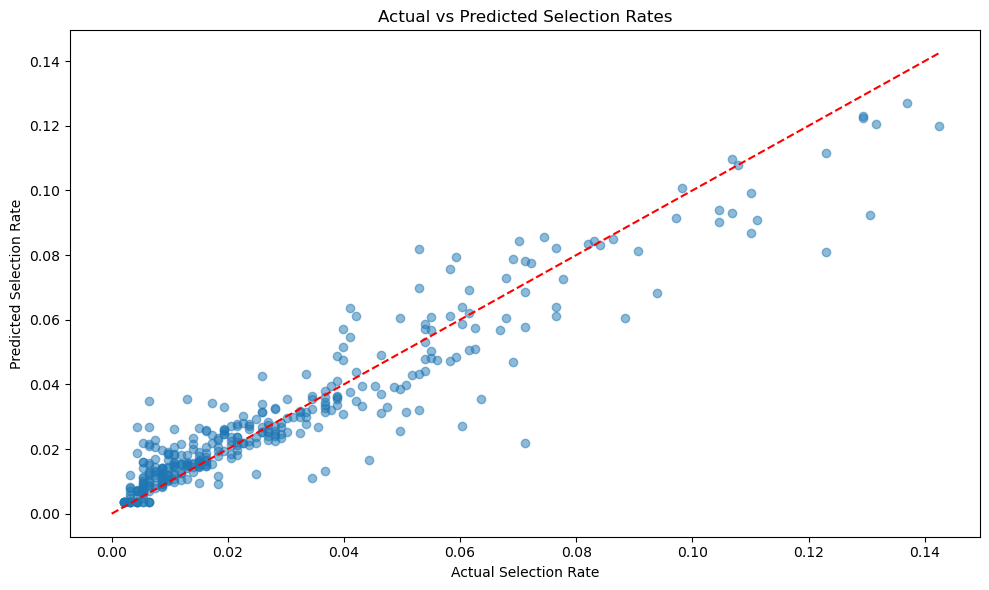

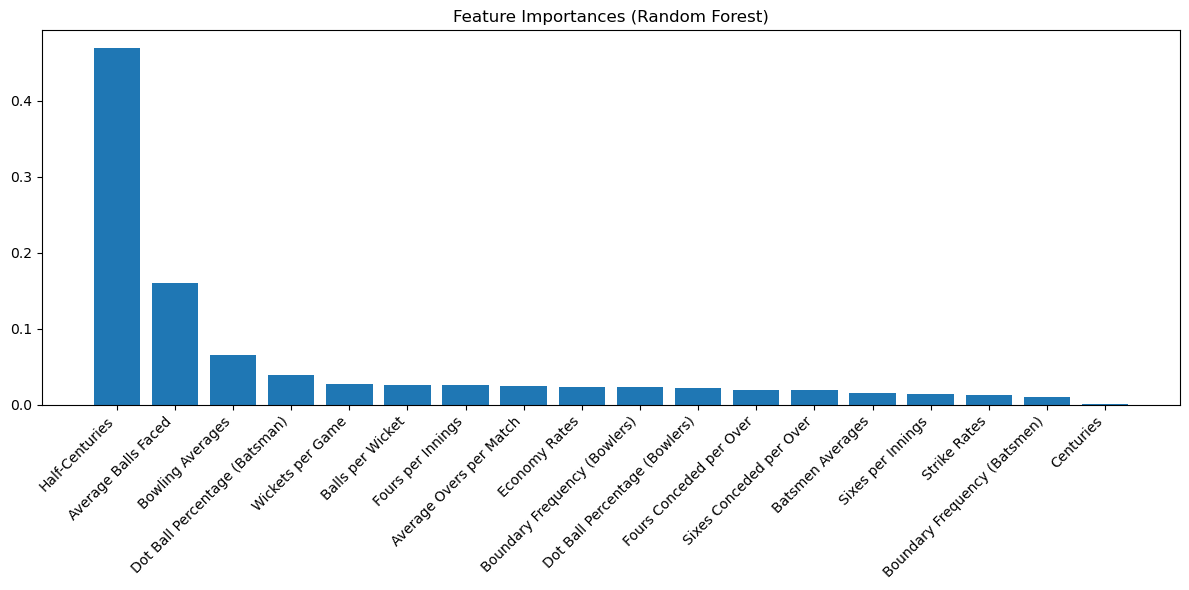


Detailed Model Performance Metrics:

Random Forest:
cv_mean: 0.6316
cv_std: 0.0460
test_rmse: 0.0152
test_r2: 0.5527
test_mae: 0.0118

Gradient Boosting:
cv_mean: 0.6421
cv_std: 0.0866
test_rmse: 0.0166
test_r2: 0.4684
test_mae: 0.0119


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def prepare_data(extracted_features_df, best_11_teams_df):
    """
    Prepare the features and target variable for modeling
    """
    # Get all players from features dataframe
    all_players = list(extracted_features_df.index)
    
    # Create target variable (selection rate for each player)
    y = pd.Series(0, index=all_players, name='selection_rate')
    
    # Calculate selection rate for each player
    for player in all_players:
        selections = sum(1 for team in best_11_teams_df['Best11Team'] if player in team)
        selection_rate = selections / len(best_11_teams_df)
        y[player] = selection_rate
    
    # Features (X) are your already calculated statistics
    X = extracted_features_df.copy()
    
    # Ensure X and y have the same index
    common_index = X.index.intersection(y.index)
    X = X.loc[common_index]
    y = y.loc[common_index]
    
    print(f"Data prepared: {X.shape[0]} players, {X.shape[1]} features")
    return X, y

def analyze_features(X, y):
    """
    Analyze feature correlations and importance
    """
    correlations = pd.DataFrame({
        'feature': X.columns,
        'correlation': [X[col].corr(y) for col in X.columns]
    })
    correlations = correlations.sort_values('correlation', ascending=False)
    
    return correlations

def train_and_evaluate(X, y):
    """
    Train and evaluate models
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    results = {}
    trained_models = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
        
        # Train on full training set
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        results[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'test_r2': r2_score(y_test, y_pred),
            'test_mae': mean_absolute_error(y_test, y_pred)
        }
        
        trained_models[name] = model
        
        print(f"CV Score: {results[name]['cv_mean']:.4f} (+/- {results[name]['cv_std']*2:.4f})")
        print(f"Test R2: {results[name]['test_r2']:.4f}")
        print(f"Test RMSE: {results[name]['test_rmse']:.4f}")
        
        if hasattr(model, 'feature_importances_'):
            importances = pd.DataFrame({
                'feature': X.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\nTop 10 Most Important Features:")
            print(importances.head(10))
    
    return results, trained_models, scaler

def main():
    # Prepare data
    X, y = prepare_data(extracted_features_df, best_11_teams_df)
    
    # Analyze features
    correlations = analyze_features(X, y)
    print("\nTop 10 Feature Correlations with Selection Rate:")
    print(correlations.head(10))
    
    # Train and evaluate models
    results, models, scaler = train_and_evaluate(X, y)
    
    # Get best model predictions
    best_model_name = max(results.items(), key=lambda x: x[1]['test_r2'])[0]
    best_model = models[best_model_name]
    
    # Make predictions for all players
    X_scaled = scaler.transform(X)
    predictions = pd.DataFrame({
        'Actual_Selection_Rate': y,
        'Predicted_Selection_Rate': best_model.predict(X_scaled)
    }, index=X.index)
    
    # Add player roles
    predictions['Role'] = [cricket_players.get(player, 'Unknown') for player in predictions.index]
    predictions = predictions.sort_values('Predicted_Selection_Rate', ascending=False)
    
    print(f"\nBest Model: {best_model_name}")
    print("\nTop 20 Players by Predicted Selection Rate:")
    print(predictions.head(20))
    
    return predictions, results, models, X  # Return X as well

# Run the analysis
predictions, model_results, trained_models, feature_matrix = main()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions['Actual_Selection_Rate'], predictions['Predicted_Selection_Rate'], alpha=0.5)
plt.plot([0, predictions['Actual_Selection_Rate'].max()], [0, predictions['Actual_Selection_Rate'].max()], 'r--')
plt.xlabel('Actual Selection Rate')
plt.ylabel('Predicted Selection Rate')
plt.title('Actual vs Predicted Selection Rates')
plt.tight_layout()
plt.show()

# Plot feature importances for the best model
best_model_name = max(model_results.items(), key=lambda x: x[1]['test_r2'])[0]
if hasattr(trained_models[best_model_name], 'feature_importances_'):
    importances = pd.DataFrame({
        'feature': feature_matrix.columns,  # Use feature_matrix instead of X
        'importance': trained_models[best_model_name].feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(importances)), importances['importance'])
    plt.xticks(range(len(importances)), importances['feature'], rotation=45, ha='right')
    plt.title(f'Feature Importances ({best_model_name})')
    plt.tight_layout()
    plt.show()

# Print detailed model performance metrics
print("\nDetailed Model Performance Metrics:")
for model_name, metrics in model_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

Data prepared: 361 players, 18 features
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/samarth/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/8de3c2fccda84deb8501da06a4cf254c-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/8de3c2fccda84deb8501da06a4cf254c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 14 COLUMNS
At line 2181 RHS
At line 2191 BOUNDS
At line 2553 ENDATA
Problem MODEL has 9 rows, 361 columns and 1083 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.20621 - 0.00 seconds
Cgl0004I processed model has 5 rows, 354 columns (354 integer (348 of which binary)) and 708 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -1.20621
Cbc0038I Cl

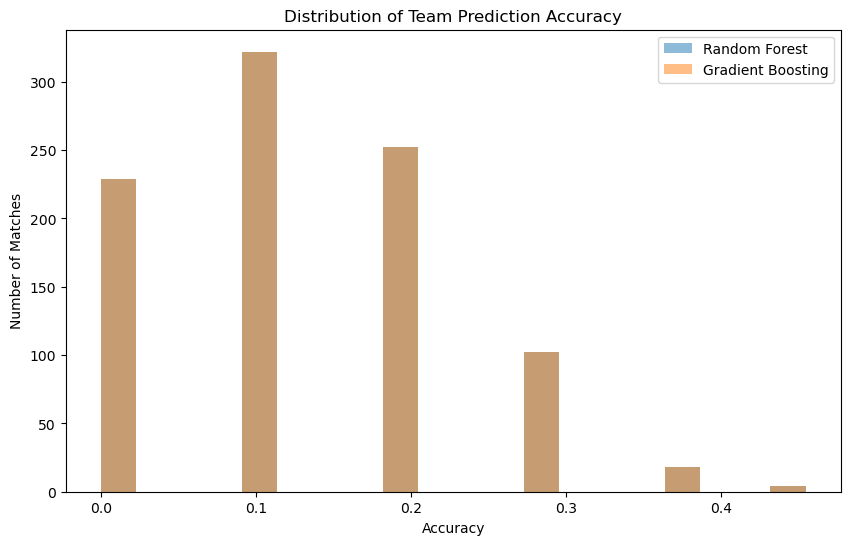


Accuracy Distribution by Model:
                   count      mean       std  min       25%       50%  \
Model                                                                   
Gradient Boosting  927.0  0.120035  0.095404  0.0  0.090909  0.090909   
Random Forest      927.0  0.120035  0.095404  0.0  0.090909  0.090909   

                        75%       max  
Model                                  
Gradient Boosting  0.181818  0.454545  
Random Forest      0.181818  0.454545  


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pulp as pl

def prepare_data(extracted_features_df, best_11_teams_df):
    """
    Prepare features and target variable
    """
    # Get all players
    all_players = list(extracted_features_df.index)
    
    # Calculate selection rate for each player
    selection_rates = {}
    total_matches = len(best_11_teams_df)
    
    for player in all_players:
        # Count how many times player appears in teams
        selections = sum(1 for team in best_11_teams_df['Best11Team'] if player in team)
        selection_rates[player] = selections / total_matches
    
    # Create target variable
    y = pd.Series(selection_rates)
    
    # Features
    X = extracted_features_df.copy()
    
    # Ensure X and y have the same index
    common_index = X.index.intersection(y.index)
    X = X.loc[common_index]
    y = y.loc[common_index]
    
    print(f"Data prepared: {X.shape[0]} players, {X.shape[1]} features")
    return X, y

def select_optimal_team(predictions_df):
    """
    Select optimal team using integer programming with constraints
    """
    # Create optimization problem
    prob = pl.LpProblem("Dream11_Team_Selection", pl.LpMaximize)
    
    # Create binary variables for each player
    players = predictions_df['Player'].tolist()
    player_vars = pl.LpVariable.dicts("Players", players, 0, 1, pl.LpBinary)
    
    # Objective function: maximize total predicted score
    prob += pl.lpSum([player_vars[player] * score for player, score 
                     in zip(players, predictions_df['Predicted_Score'])])
    
    # Constraints
    # Total 11 players
    prob += pl.lpSum([player_vars[player] for player in players]) == 11
    
    roles = predictions_df['Role'].tolist()
    
    # Role constraints
    prob += pl.lpSum([player_vars[player] for player, role in zip(players, roles) if role == 'WK']) >= 1
    prob += pl.lpSum([player_vars[player] for player, role in zip(players, roles) if role == 'WK']) <= 4
    
    prob += pl.lpSum([player_vars[player] for player, role in zip(players, roles) if role == 'BAT']) >= 3
    prob += pl.lpSum([player_vars[player] for player, role in zip(players, roles) if role == 'BAT']) <= 6
    
    prob += pl.lpSum([player_vars[player] for player, role in zip(players, roles) if role == 'AR']) >= 1
    prob += pl.lpSum([player_vars[player] for player, role in zip(players, roles) if role == 'AR']) <= 4
    
    prob += pl.lpSum([player_vars[player] for player, role in zip(players, roles) if role == 'BWL']) >= 3
    prob += pl.lpSum([player_vars[player] for player, role in zip(players, roles) if role == 'BWL']) <= 6

    # Solve
    prob.solve()
    
    return [player for player in players if player_vars[player].value() == 1]

def evaluate_models(X, y, best_11_teams_df, cricket_players):
    """
    Train models and evaluate team predictions
    """
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
    
    # Initialize models
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    results = {name: [] for name in models.keys()}
    match_results = []
    
    # For each match
    for idx, row in best_11_teams_df.iterrows():
        try:
            # Get actual team
            actual_team = row['Best11Team']
            if isinstance(actual_team, str):
                actual_team = eval(actual_team)
            
            if not actual_team:  # Skip if no team data
                continue
                
            # For each model
            for name, model in models.items():
                # Train model excluding current match
                model.fit(X_scaled, y)
                
                # Make predictions
                predictions = model.predict(X_scaled)
                
                # Create predictions dataframe
                predictions_df = pd.DataFrame({
                    'Player': X.index,
                    'Predicted_Score': predictions,
                    'Role': [cricket_players.get(p, 'Unknown') for p in X.index]
                })
                
                # Select optimal team
                predicted_team = select_optimal_team(predictions_df)
                
                # Calculate accuracy
                common_players = set(predicted_team) & set(actual_team)
                accuracy = len(common_players) / 11
                results[name].append(accuracy)
                
                # Store match results
                match_results.append({
                    'Match': idx,
                    'Model': name,
                    'Accuracy': accuracy,
                    'Common Players': len(common_players),
                    'Predicted Team': predicted_team,
                    'Actual Team': actual_team
                })
                
                # Print details for first few matches
                if idx < 5:
                    print(f"\nMatch {idx + 1} - {name}:")
                    print(f"Accuracy: {accuracy:.3f} ({len(common_players)} correct out of 11)")
                    print("\nPredicted Team:")
                    for p in predicted_team:
                        print(f"{p}: {cricket_players.get(p, 'Unknown')}")
                    print("\nActual Team:")
                    for p in actual_team:
                        print(f"{p}: {cricket_players.get(p, 'Unknown')}")
                    print("\nCorrectly Predicted Players:")
                    for p in common_players:
                        print(f"{p}: {cricket_players.get(p, 'Unknown')}")
                        
        except Exception as e:
            print(f"Error processing match {idx}: {e}")
            continue
    
    # Print overall results
    print("\nOverall Results:")
    for name in models.keys():
        accuracies = results[name]
        if accuracies:
            avg_accuracy = np.mean(accuracies)
            std_accuracy = np.std(accuracies)
            min_acc = min(accuracies)
            max_acc = max(accuracies)
            print(f"\n{name}:")
            print(f"Average Accuracy: {avg_accuracy:.3f} ± {std_accuracy:.3f}")
            print(f"Min Accuracy: {min_acc:.3f}")
            print(f"Max Accuracy: {max_acc:.3f}")
            print(f"Number of matches evaluated: {len(accuracies)}")
    
    return pd.DataFrame(match_results)

def analyze_feature_importance(model, X):
    """
    Analyze and display feature importance
    """
    if hasattr(model, 'feature_importances_'):
        importances = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(12, 6))
        plt.bar(range(len(importances)), importances['importance'])
        plt.xticks(range(len(importances)), importances['feature'], rotation=45, ha='right')
        plt.title('Feature Importances')
        plt.tight_layout()
        plt.show()
        
        return importances

def main():
    # Prepare data
    X, y = prepare_data(extracted_features_df, best_11_teams_df)
    
    # Run evaluation
    results_df = evaluate_models(X, y, best_11_teams_df, cricket_players)
    
    # Plot accuracy distributions
    plt.figure(figsize=(10, 6))
    for name in results_df['Model'].unique():
        model_accuracies = results_df[results_df['Model'] == name]['Accuracy']
        plt.hist(model_accuracies, alpha=0.5, label=name, bins=20)
    plt.xlabel('Accuracy')
    plt.ylabel('Number of Matches')
    plt.title('Distribution of Team Prediction Accuracy')
    plt.legend()
    plt.show()
    
    # Print summary statistics
    print("\nAccuracy Distribution by Model:")
    print(results_df.groupby('Model')['Accuracy'].describe())
    
    return results_df

# Run the analysis
results_df = main()

Data prepared: 361 players, 18 features

Top 10 Feature Correlations with Selection Rate:
                          feature  correlation
4                  Half-Centuries     0.614962
17   Boundary Frequency (Bowlers)     0.231059
12                  Economy Rates     0.188561
14        Fours Conceded per Over     0.182699
1                    Strike Rates     0.182192
7   Dot Ball Percentage (Batsman)     0.169260
0                Batsmen Averages     0.162468
3                       Centuries     0.154559
13        Sixes Conceded per Over     0.140364
16   Boundary Frequency (Batsmen)     0.130165

Training Random Forest...
CV Score: 0.6316 (+/- 0.0920)
Test R2: 0.5527
Test RMSE: 0.0152

Top 10 Most Important Features:
                          feature  importance
4                  Half-Centuries    0.469148
2             Average Balls Faced    0.160305
9                Bowling Averages    0.065844
7   Dot Ball Percentage (Batsman)    0.039386
11               Wickets per Game    0.

/var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/ipykernel_18951/772499667.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(results.keys(), rotation=45, ha='right')


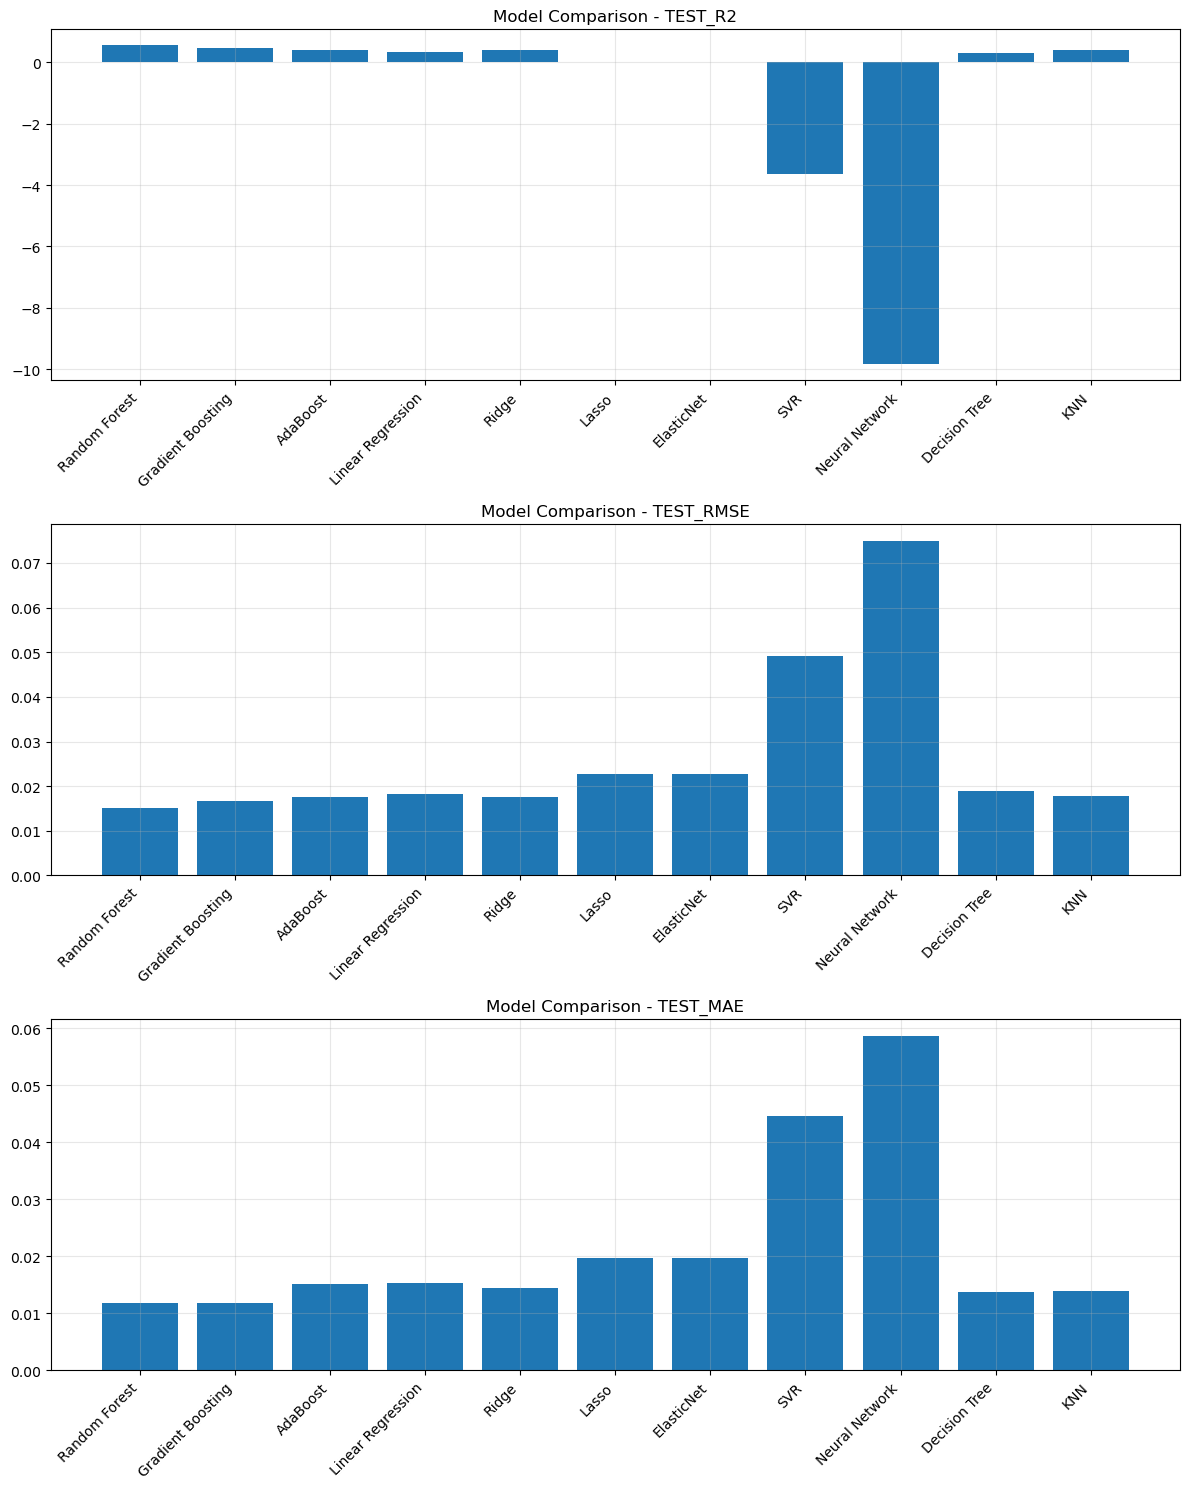


Best Model: Random Forest

Top 20 Players by Predicted Selection Rate:
                 Actual_Selection_Rate  Predicted_Selection_Rate Role
V Kohli                       0.137001                  0.127152  BAT
RG Sharma                     0.129450                  0.122891  BAT
SK Raina                      0.129450                  0.122481  BAT
S Dhawan                      0.131607                  0.120669  BAT
MS Dhoni                      0.142395                  0.120032   WK
RV Uthappa                    0.122977                  0.111683   WK
AB de Villiers                0.106796                  0.109827  BAT
DA Warner                     0.107875                  0.107896  BAT
AT Rayudu                     0.098166                  0.100636  BAT
R Ashwin                      0.110032                  0.099288   AR
SR Watson                     0.104639                  0.094056   AR
PP Chawla                     0.106796                  0.092988  BWL
RA Jadeja         

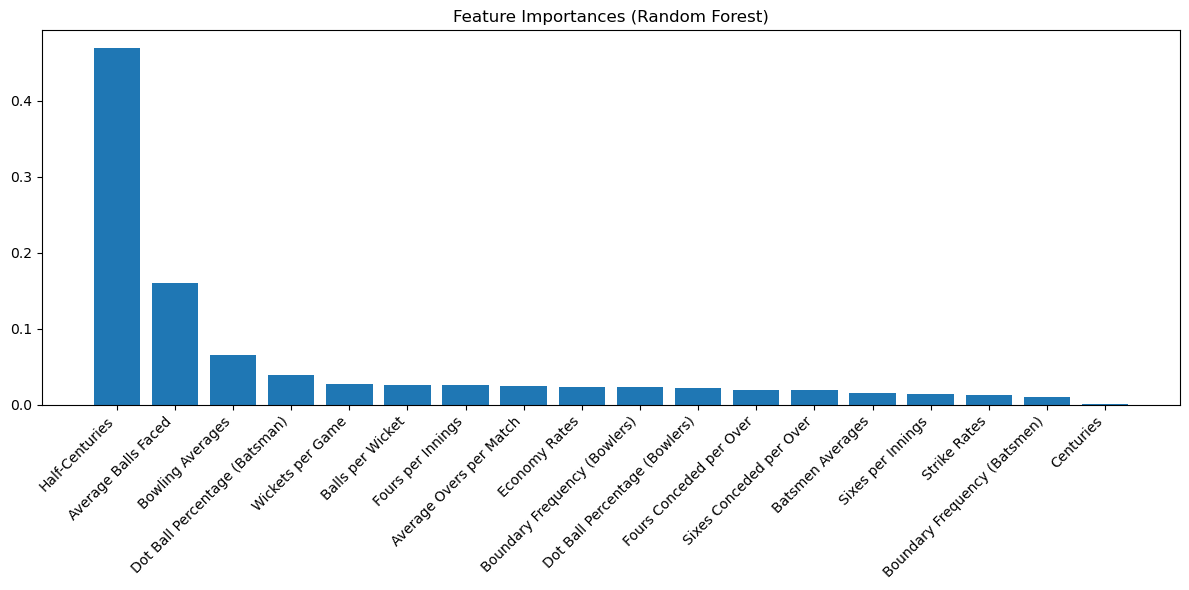

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

def prepare_data(extracted_features_df, best_11_teams_df):
    """
    Prepare the features and target variable for modeling
    """
    # Get all players from features dataframe
    all_players = list(extracted_features_df.index)
    
    # Create target variable (selection rate for each player)
    y = pd.Series(0, index=all_players, name='selection_rate')
    
    # Calculate selection rate for each player
    for player in all_players:
        selections = sum(1 for team in best_11_teams_df['Best11Team'] if player in team)
        selection_rate = selections / len(best_11_teams_df)
        y[player] = selection_rate
    
    # Features (X) are your already calculated statistics
    X = extracted_features_df.copy()
    
    # Ensure X and y have the same index
    common_index = X.index.intersection(y.index)
    X = X.loc[common_index]
    y = y.loc[common_index]
    
    print(f"Data prepared: {X.shape[0]} players, {X.shape[1]} features")
    return X, y

def analyze_features(X, y):
    """
    Analyze feature correlations and importance
    """
    correlations = pd.DataFrame({
        'feature': X.columns,
        'correlation': [X[col].corr(y) for col in X.columns]
    })
    correlations = correlations.sort_values('correlation', ascending=False)
    
    return correlations

def train_and_evaluate(X, y):
    """
    Train and evaluate an expanded set of models
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize expanded set of models
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'AdaBoost': AdaBoostRegressor(random_state=42),
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(random_state=42),
        'Lasso': Lasso(random_state=42),
        'ElasticNet': ElasticNet(random_state=42),
        'SVR': SVR(kernel='rbf'),
        'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'KNN': KNeighborsRegressor(n_neighbors=5)
    }
    
    results = {}
    trained_models = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
        
        # Train on full training set
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        results[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'test_r2': r2_score(y_test, y_pred),
            'test_mae': mean_absolute_error(y_test, y_pred)
        }
        
        trained_models[name] = model
        
        print(f"CV Score: {results[name]['cv_mean']:.4f} (+/- {results[name]['cv_std']*2:.4f})")
        print(f"Test R2: {results[name]['test_r2']:.4f}")
        print(f"Test RMSE: {results[name]['test_rmse']:.4f}")
        
        # Feature importance for models that support it
        if hasattr(model, 'feature_importances_'):
            importances = pd.DataFrame({
                'feature': X.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\nTop 10 Most Important Features:")
            print(importances.head(10))
    
    return results, trained_models, scaler

def plot_model_comparison(results):
    """
    Plot comparison of model performances
    """
    metrics = ['test_r2', 'test_rmse', 'test_mae']
    n_metrics = len(metrics)
    
    fig, axes = plt.subplots(n_metrics, 1, figsize=(12, 5*n_metrics))
    
    for i, metric in enumerate(metrics):
        metric_values = [results[model][metric] for model in results.keys()]
        axes[i].bar(results.keys(), metric_values)
        axes[i].set_title(f'Model Comparison - {metric.upper()}')
        axes[i].set_xticklabels(results.keys(), rotation=45, ha='right')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def main():
    # Prepare data
    X, y = prepare_data(extracted_features_df, best_11_teams_df)
    
    # Analyze features
    correlations = analyze_features(X, y)
    print("\nTop 10 Feature Correlations with Selection Rate:")
    print(correlations.head(10))
    
    # Train and evaluate models
    results, models, scaler = train_and_evaluate(X, y)
    
    # Plot model comparison
    comparison_plot = plot_model_comparison(results)
    plt.show()
    
    # Get best model predictions
    best_model_name = max(results.items(), key=lambda x: x[1]['test_r2'])[0]
    best_model = models[best_model_name]
    
    # Make predictions for all players
    X_scaled = scaler.transform(X)
    predictions = pd.DataFrame({
        'Actual_Selection_Rate': y,
        'Predicted_Selection_Rate': best_model.predict(X_scaled)
    }, index=X.index)
    
    # Add player roles
    predictions['Role'] = [cricket_players.get(player, 'Unknown') for player in predictions.index]
    predictions = predictions.sort_values('Predicted_Selection_Rate', ascending=False)
    
    print(f"\nBest Model: {best_model_name}")
    print("\nTop 20 Players by Predicted Selection Rate:")
    print(predictions.head(20))
    
    # Create feature importance plot for best model
    if hasattr(best_model, 'feature_importances_'):
        plt.figure(figsize=(12, 6))
        importances = pd.DataFrame({
            'feature': X.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.bar(range(len(importances)), importances['importance'])
        plt.xticks(range(len(importances)), importances['feature'], rotation=45, ha='right')
        plt.title(f'Feature Importances ({best_model_name})')
        plt.tight_layout()
        plt.show()
    
    return predictions, results, models, X

# Run the analysis
predictions, model_results, trained_models, feature_matrix = main()